# Credit Risk Modeling

This project is based on the Lending Club Loan Dataset. Lending Club is a peer-to-peer Lending company based in the US. They match people looking to invest money with people looking to borrow money.

The Lending Club dataset contains complete loan data for all loans issued through the 2007-2018, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. Features (aka variables) include credit scores, number of finance inquiries, address including zip codes and state, and collections among others. Collections indicates whether the customer has missed one or more payments and the team is trying to recover their money. The file is a matrix of more than 2 million observations and 153 variables.

In [139]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, plot_roc_curve, roc_auc_score, \
confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, mean_squared_error, \
r2_score, roc_curve


# First look at the data

In [2]:
pd.options.display.max_columns = 25
pd.options.display.max_rows = 25
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
df = pd.read_csv('loan.csv')

C:\Users\tejas\AppData\Local\Temp\ipykernel_2452\129683778.py:1: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.00000,36 months,13.56000,84.92000,C,C1,Chef,10+ years,...,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.00000,60 months,18.94000,777.23000,D,D2,Postmaster,10+ years,...,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.00000,36 months,17.97000,180.69000,D,D1,Administrative,6 years,...,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.00000,36 months,18.94000,146.51000,D,D2,IT Supervisor,10+ years,...,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.00000,60 months,16.14000,731.78000,C,C4,Mechanic,10+ years,...,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2260663,NaN,NaN,12000,12000,12000.00000,60 months,14.08000,279.72000,C,C3,house keeper,10+ years,...,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260664,NaN,NaN,12000,12000,12000.00000,60 months,25.82000,358.01000,E,E4,Skilled Labor,< 1 year,...,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260665,NaN,NaN,10000,10000,10000.00000,36 months,11.99000,332.10000,B,B5,Teacher,10+ years,...,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260666,NaN,NaN,12000,12000,12000.00000,60 months,21.45000,327.69000,D,D5,NaN,NaN,...,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260667,NaN,NaN,16550,16550,16550.00000,60 months,21.45000,451.94000,D,D5,BABYSITTER,3 years,...,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(2260668, 145)

In [7]:
df.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [8]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,...,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.00000,0.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260664.00000,0.00000,2258957.00000,2260639.00000,2260638.00000,...,108021.00000,35942.00000,10613.00000,10613.00000,10613.00000,10613.00000,8426.00000,10613.00000,10613.00000,33056.00000,33056.00000,33056.00000
mean,NaN,NaN,15046.93123,15041.66406,15023.43762,13.09291,445.80765,77992.42869,NaN,18.82420,0.30688,0.57684,...,0.07757,36.93793,3.00000,155.00670,3.00000,13.68642,454.84080,11628.03644,193.60633,5030.60692,47.77560,13.14860
std,NaN,NaN,9190.24549,9188.41302,9192.33181,4.83211,267.17372,112696.19957,NaN,14.18333,0.86723,0.88596,...,0.40800,23.92458,0.00000,129.11314,0.00000,9.72814,375.83074,7615.16112,198.69437,3692.02784,7.33638,8.19232
min,NaN,NaN,500.00000,500.00000,0.00000,5.31000,4.93000,0.00000,NaN,-1.00000,0.00000,0.00000,...,0.00000,0.00000,3.00000,0.64000,3.00000,0.00000,1.92000,55.73000,0.01000,44.21000,0.20000,0.00000
25%,NaN,NaN,8000.00000,8000.00000,8000.00000,9.49000,251.65000,46000.00000,NaN,11.89000,0.00000,0.00000,...,0.00000,16.00000,3.00000,59.37000,3.00000,5.00000,174.96750,5628.73000,43.78000,2227.00000,45.00000,6.00000
50%,NaN,NaN,12900.00000,12875.00000,12800.00000,12.62000,377.99000,65000.00000,NaN,17.84000,0.00000,0.00000,...,0.00000,36.00000,3.00000,119.04000,3.00000,15.00000,352.60500,10044.22000,132.89000,4172.85500,45.00000,14.00000
75%,NaN,NaN,20000.00000,20000.00000,20000.00000,15.99000,593.32000,93000.00000,NaN,24.49000,0.00000,1.00000,...,0.00000,56.00000,3.00000,213.26000,3.00000,22.00000,622.79250,16114.94000,284.18000,6870.78250,50.00000,18.00000
max,NaN,NaN,40000.00000,40000.00000,40000.00000,30.99000,1719.83000,110000000.00000,NaN,999.00000,58.00000,33.00000,...,23.00000,185.00000,3.00000,943.94000,3.00000,37.00000,2680.89000,40306.41000,1407.86000,33601.00000,521.35000,181.00000


# General Preprocessing

In [9]:
df.isnull().sum()

id                       2260668
member_id                2260668
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
                          ...   
settlement_status        2227612
settlement_date          2227612
settlement_amount        2227612
settlement_percentage    2227612
settlement_term          2227612
Length: 145, dtype: int64

### Preprocessing few continuous variables

It's easier to view the missing values as percentages.

In [10]:
# Employment Length
df['emp_length'].unique()

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', nan, '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

Need to convert these into integer values.

In [11]:
df['emp_len_int'] = df['emp_length'].str.replace('\+ years', '')
df['emp_len_int'] = df['emp_len_int'].str.replace('< 1 year', str(0))
df['emp_len_int'] = df['emp_len_int'].str.replace('n/a',  str(0))
df['emp_len_int'] = df['emp_len_int'].str.replace(' years', '')
df['emp_len_int'] = df['emp_len_int'].str.replace(' year', '')
df['emp_len_int'] = pd.to_numeric(df['emp_len_int'])

C:\Users\tejas\AppData\Local\Temp\ipykernel_2452\1981217827.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['emp_len_int'] = df['emp_length'].str.replace('\+ years', '')


In [12]:
# Earliest Credit Line
df['earliest_cr_line'].head()

0    Apr-2001
1    Jun-1987
2    Apr-2011
3    Feb-2006
4    Dec-2000
Name: earliest_cr_line, dtype: object

Need to convert into datetime objects and calculate a new column 'Months Since Earliest Credit Line'. Since the data goes up to Dec 2018, that can be assumed as the baseline from which the new column can be calculated.

In [13]:
df.isnull().sum()/df.shape[0]*100

id                      100.00000
member_id               100.00000
loan_amnt                 0.00000
funded_amnt               0.00000
funded_amnt_inv           0.00000
                           ...   
settlement_date          98.53778
settlement_amount        98.53778
settlement_percentage    98.53778
settlement_term          98.53778
emp_len_int               6.49839
Length: 146, dtype: float64

In [14]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%Y', errors='coerce')

In [15]:
df['earliest_cr_line_date'].head()

0   2001-04-01
1   1987-06-01
2   2011-04-01
3   2006-02-01
4   2000-12-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [16]:
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2018-12-01') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [17]:
df['mths_since_earliest_cr_line'].describe()

count   2260639.00000
mean        227.68910
std          94.16722
min          37.00000
25%         163.00000
50%         212.00000
75%         277.00000
max        1029.00000
Name: mths_since_earliest_cr_line, dtype: float64

In [18]:
df['mths_since_earliest_cr_line'].head()

0   212.00000
1   378.00000
2    92.00000
3   154.00000
4   216.00000
Name: mths_since_earliest_cr_line, dtype: float64

In [19]:
# Length of term in months
df['term'].head()

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [20]:
df['term_int'] = pd.to_numeric(df['term'].str.replace(' months', ''))
df['term_int'].describe()

count   2260668.00000
mean         42.91032
std          10.86716
min          36.00000
25%          36.00000
50%          36.00000
75%          60.00000
max          60.00000
Name: term_int, dtype: float64

In [21]:
# Issue Date
df['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

Some of the columns have more than 90% missing values. It might be okay dropping these columns, since most of the information is not available. Their importance can be gauged at a later stage if required.

In [22]:
idx = np.where(df.isnull().sum()/df.shape[0]*100 > 90)
df.drop(df.columns[idx], axis=1, inplace=True)
df.shape

(2260668, 111)

Need to do same preprocessing as 'Earliest Credit Line' column.

In [23]:
df['issue_d_date'] = pd.to_datetime(df['issue_d'], format = '%b-%Y')
df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2018-12-01') - df['issue_d_date']) / np.timedelta64(1, 'M')))
df['mths_since_issue_d'].describe()

count   2260668.00000
mean         30.95439
std          21.61178
min           0.00000
25%          13.00000
50%          29.00000
75%          44.00000
max         138.00000
Name: mths_since_issue_d, dtype: float64

### Preprocessing few discrete variables

The missing values in 'Total revolving high credit/ credit limit' column can be substituted with the 'Funded Amount' column.

Preprocessing in this step includes the following discrete variables: grade, sub_grade, home_ownership, verification_status, loan_status, purpose, addr_state, initial_list_status. Most likely, sub_grade won't be used, as it overlaps with grade.

In [24]:
df_dummies = [pd.get_dummies(df['grade'], prefix = 'grade', prefix_sep = ':'),
             pd.get_dummies(df['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
             pd.get_dummies(df['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
             pd.get_dummies(df['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
             pd.get_dummies(df['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
             pd.get_dummies(df['purpose'], prefix = 'purpose', prefix_sep = ':'),
             pd.get_dummies(df['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
             pd.get_dummies(df['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [25]:
df_dummies = pd.concat(df_dummies, axis = 1)

In [26]:
df = pd.concat([df, df_dummies], axis = 1)

In [27]:
df.columns.values

array(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il',
       'open_i

### Check for missing values and clean

In [28]:
df['total_rev_hi_lim'].fillna(df['funded_amnt'], inplace=True)

In [29]:
# Missing values as percentages
miss_values = df.isnull().sum()/df.shape[0]*100
miss_values[miss_values > 0]

emp_title                     7.38583
emp_length                    6.49839
annual_inc                    0.00018
title                         1.03177
zip_code                      0.00004
                                ...  
total_bc_limit                2.21306
total_il_high_credit_limit    3.10864
emp_len_int                   6.49839
earliest_cr_line_date         0.00128
mths_since_earliest_cr_line   0.00128
Length: 77, dtype: float64

Some of the columns have more than 90% values missing. It might be better to drop these columns since they don't provide a lot of information. Their importance can be gauged at a later stage if required.

The missing values in 'Annual Income' column can be filled in using the mean annual income of all consumers.

In [30]:
df.drop(df.columns[miss_values>90], axis=1, inplace=True)

'Total revolving high credit / credit limit' has some missing values that can be filled with values of 'Funded Amount'. Similarly, missing values in 'Annual Income' column can be filled in with the mean annual income. Some of the other important columns are filled in with 0.

In [31]:
df['total_rev_hi_lim'].fillna(df['funded_amnt'], inplace=True)
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)
df['mths_since_earliest_cr_line'].fillna(0, inplace=True)
df['acc_now_delinq'].fillna(0, inplace=True)
df['total_acc'].fillna(0, inplace=True)
df['pub_rec'].fillna(0, inplace=True)
df['open_acc'].fillna(0, inplace=True)
df['inq_last_6mths'].fillna(0, inplace=True)
df['delinq_2yrs'].fillna(0, inplace=True)
df['emp_len_int'].fillna(0, inplace=True)

In [32]:
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)

Missing values in some of the other columns are filled in with 0.

In [33]:
df['mths_since_earliest_cr_line'].fillna(0, inplace=True)
df['acc_now_delinq'].fillna(0, inplace=True)
df['total_acc'].fillna(0, inplace=True)
df['pub_rec'].fillna(0, inplace=True)
df['open_acc'].fillna(0, inplace=True)
df['inq_last_6mths'].fillna(0, inplace=True)
df['delinq_2yrs'].fillna(0, inplace=True)
df['emp_len_int'].fillna(0, inplace=True)

# PD Model

## Data Preparation

Target variable needs to be binary. This can be done using 'Loan Status' column.

In [34]:
df['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

Default Loans can be defined as ones that have Loan Status as 'Charged Off', 'Does not meet the credit policy. Status:Charged Off' or 'Late (31-120 days)'. Default Loans are given a value of 0, while Non-Default Loans are given a value of 1.

In [35]:
df['target'] = np.where(df['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)

In [36]:
df['target'].head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int32

### Preprocessing Variables

It is useful to calculate Information Value in order to understand to what extent an independent variable would predict a dependent variable. It is given by the following formula:

$$\text{IV} = \sum (\text{%good}-\text{%bad}) * \ln\left(\frac{\text{%good}}{\text{%bad}}\right)$$

where %good are the non-defaulters whereas %bad are the defaulters. The logarithmic part of the expression is referred to as 'Weight of Evidence'. Thus
$$\text{IV} = \sum (\text{%good}-\text{%bad}) * \text{WoE}$$

In [37]:
# WoE function for variables
def woe(df, inp_col):
    df = pd.concat([df[inp_col], df['target']], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

#### Grade

In [38]:
df_temp = woe(df, 'grade')
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,12168,0.60470,0.00538,7358.00000,4810.00000,0.00372,0.01692,-1.51372,NaN,NaN,0.48162
1,F,41800,0.63933,0.01849,26724.00000,15076.00000,0.01352,0.05302,-1.36635,0.03463,0.14737,0.48162
2,E,135639,0.72167,0.06000,97887.00000,37752.00000,0.04953,0.13277,-0.98603,0.08234,0.38032,0.48162
3,D,324424,0.80078,0.14351,259793.00000,64631.00000,0.13145,0.22730,-0.54762,0.07911,0.43842,0.48162
4,C,650053,0.85992,0.28755,558994.00000,91059.00000,0.28285,0.32024,-0.12418,0.05914,0.42344,0.48162
5,B,663557,0.91572,0.29352,607631.00000,55926.00000,0.30746,0.19668,0.44673,0.05580,0.57091,0.48162
6,A,433027,0.96515,0.19155,417937.00000,15090.00000,0.21147,0.05307,1.38249,0.04943,0.93576,0.48162


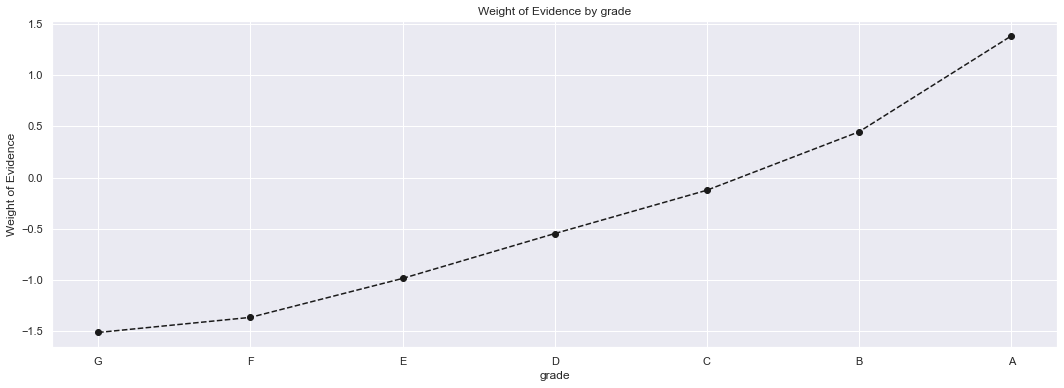

In [39]:
# Function to plot Weight of Evidence.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)
plot_by_woe(df_temp)

#### Home Ownership

In [40]:
df_temp = woe(df, 'home_ownership')
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,182,0.79121,0.00008,144.00000,38.00000,0.00007,0.00013,-0.60658,NaN,NaN,0.02506
1,NONE,54,0.85185,0.00002,46.00000,8.00000,0.00002,0.00003,-0.18961,0.06064,0.41697,0.02506
2,RENT,894929,0.85360,0.39587,763913.00000,131016.00000,0.38653,0.46077,-0.17567,0.00175,0.01393,0.02506
3,OWN,253057,0.87433,0.11194,221256.00000,31801.00000,0.11195,0.11184,0.00101,0.02073,0.17669,0.02506
4,MORTGAGE,1111450,0.89076,0.49165,990034.00000,121416.00000,0.50095,0.42700,0.15971,0.01643,0.15869,0.02506
5,ANY,996,0.93474,0.00044,931.00000,65.00000,0.00047,0.00023,0.72306,0.04398,0.56336,0.02506


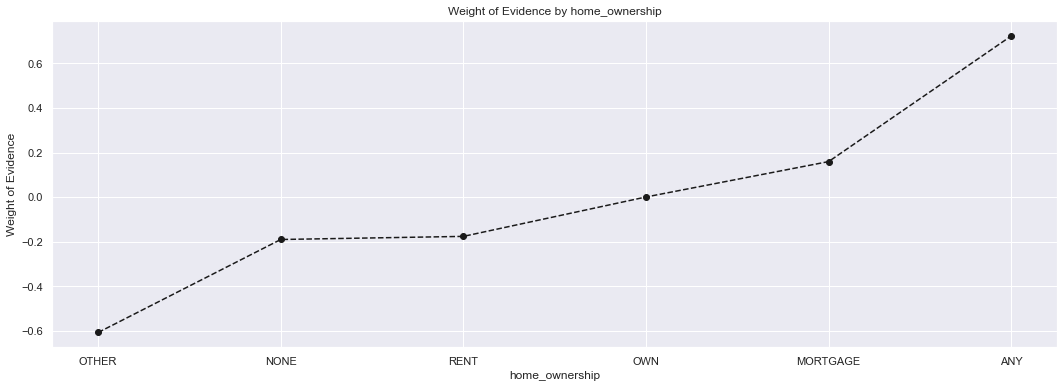

In [41]:
plot_by_woe(df_temp)

Based on Weight of Evidence as well as Number of Observations for each of the Home Ownership values, it makes sense to combine OTHER, NONE, RENT and ANY into one variable.

In [42]:
df['home_ownership:RENT_OTHER_NONE_ANY'] = \
sum([df['home_ownership:RENT'], \
     df['home_ownership:OTHER'], \
     df['home_ownership:NONE'], \
     df['home_ownership:ANY']])

#### Address State

In [43]:
df['addr_state'].unique()

array(['NY', 'LA', 'MI', 'WA', 'MD', 'IN', 'IL', 'FL', 'CT', 'GA', 'UT',
       'NC', 'KY', 'OH', 'AR', 'OK', 'CA', 'WV', 'NJ', 'SC', 'TX', 'PA',
       'KS', 'AL', 'VA', 'MO', 'AZ', 'NM', 'CO', 'RI', 'WI', 'TN', 'NV',
       'MA', 'NE', 'MN', 'NH', 'OR', 'VT', 'DC', 'MS', 'ID', 'DE', 'ND',
       'HI', 'ME', 'AK', 'WY', 'MT', 'SD', 'IA'], dtype=object)

In [44]:
df_temp = woe(df, 'addr_state')
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,IA,14,0.78571,0.00001,11.00000,3.00000,0.00001,0.00001,-0.63953,NaN,NaN,0.01443
1,AL,27284,0.84797,0.01207,23136.00000,4148.00000,0.01171,0.01459,-0.22005,0.06226,0.41948,0.01443
2,AR,17074,0.85106,0.00755,14531.00000,2543.00000,0.00735,0.00894,-0.19587,0.00309,0.02418,0.01443
3,MS,12639,0.85268,0.00559,10777.00000,1862.00000,0.00545,0.00655,-0.18305,0.00162,0.01282,0.01443
4,LA,25759,0.85287,0.01139,21969.00000,3790.00000,0.01112,0.01333,-0.18154,0.00019,0.00150,0.01443
...,...,...,...,...,...,...,...,...,...,...,...,...
46,NH,11142,0.90819,0.00493,10119.00000,1023.00000,0.00512,0.00360,0.35287,0.00177,0.02103,0.01443
47,DC,5356,0.90870,0.00237,4867.00000,489.00000,0.00246,0.00172,0.35906,0.00052,0.00620,0.01443
48,VT,4937,0.91959,0.00218,4540.00000,397.00000,0.00230,0.00140,0.49794,0.01089,0.13888,0.01443
49,ID,4308,0.92108,0.00191,3968.00000,340.00000,0.00201,0.00120,0.51826,0.00149,0.02033,0.01443


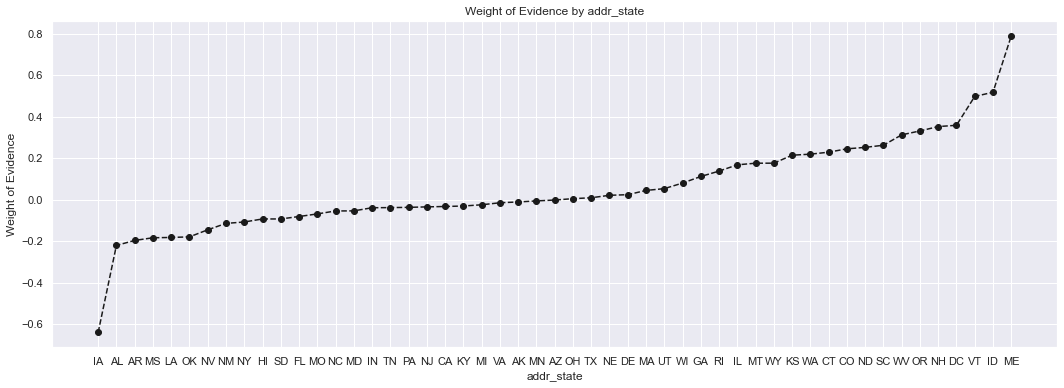

In [45]:
plot_by_woe(df_temp)

Based on the Number of Observations and the Weight of Evidence values, the following categories can be made:  
'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'  
'NM' 'VA'  
'NY'  
'OK' 'TN' 'MO' 'LA' 'MD' 'NC'  
'CA'  
'UT' 'KY' 'AZ' 'NJ'  
'AR' 'MI' 'PA' 'OH' 'MN'  
'RI' 'MA' 'DE' 'SD' 'IN'  
'GA' 'WA' 'OR'  
'WI' 'MT'  
'TX'  
'IL' 'CT'  
'KS' 'SC' 'CO' 'VT' 'AK' 'MS'  
'WV' 'NH' 'WY' 'DC' 'ME' 'ID'  

In [46]:
df['addr_state:ND_NE_IA_NV_FL_HI_AL'] = \
sum([df['addr_state:ND'], df['addr_state:NE'], df['addr_state:IA'], \
     df['addr_state:NV'], df['addr_state:FL'], df['addr_state:HI'], \
     df['addr_state:AL']])

df['addr_state:NM_VA'] = sum([df['addr_state:NM'], df['addr_state:VA']])

df['addr_state:OK_TN_MO_LA_MD_NC'] = \
sum([df['addr_state:OK'], df['addr_state:TN'], df['addr_state:MO'], \
     df['addr_state:LA'], df['addr_state:MD'], df['addr_state:NC']])

df['addr_state:UT_KY_AZ_NJ'] = \
sum([df['addr_state:UT'], df['addr_state:KY'], df['addr_state:AZ'], \
     df['addr_state:NJ']])

df['addr_state:AR_MI_PA_OH_MN'] = \
sum([df['addr_state:AR'], df['addr_state:MI'], df['addr_state:PA'], \
     df['addr_state:OH'], df['addr_state:MN']])

df['addr_state:RI_MA_DE_SD_IN'] = \
sum([df['addr_state:RI'], df['addr_state:MA'], df['addr_state:DE'], \
     df['addr_state:SD'], df['addr_state:IN']])

df['addr_state:GA_WA_OR'] = \
sum([df['addr_state:GA'], df['addr_state:WA'], df['addr_state:OR']])

df['addr_state:WI_MT'] = sum([df['addr_state:WI'], df['addr_state:MT']])

df['addr_state:IL_CT'] = sum([df['addr_state:IL'], df['addr_state:CT']])

df['addr_state:KS_SC_CO_VT_AK_MS'] = \
sum([df['addr_state:KS'], df['addr_state:SC'], df['addr_state:CO'], \
     df['addr_state:VT'], df['addr_state:AK'], df['addr_state:MS']])

df['addr_state:WV_NH_WY_DC_ME_ID'] = \
sum([df['addr_state:WV'], df['addr_state:NH'], df['addr_state:WY'], \
     df['addr_state:DC'], df['addr_state:ME'], df['addr_state:ID']])

#### Verification Status

In [47]:
df_temp = woe(df, 'verification_status')
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,629631,0.83367,0.27852,524905.00000,104726.00000,0.26560,0.36831,-0.32694,NaN,NaN,0.08535
1,Source Verified,886231,0.86947,0.39202,770551.00000,115680.00000,0.38989,0.40683,-0.04253,0.03580,0.28441,0.08535
2,Not Verified,744806,0.91415,0.32946,680868.00000,63938.00000,0.34451,0.22486,0.42665,0.04469,0.46918,0.08535


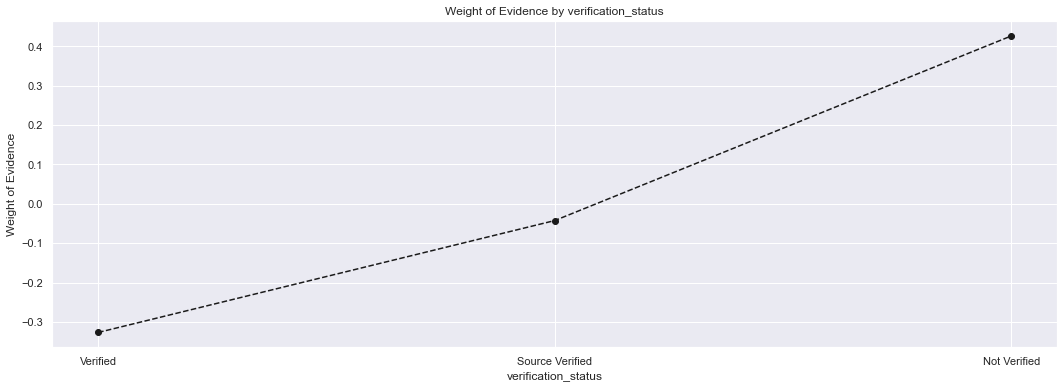

In [48]:
plot_by_woe(df_temp)

#### Purpose

In [49]:
df_temp = woe(df, 'purpose')
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,424,0.79245,0.00019,336.00000,88.00000,0.00017,0.00031,-0.59903,NaN,NaN,0.02331
1,small_business,24689,0.80186,0.01092,19797.00000,4892.00000,0.01002,0.01720,-0.54088,0.00940,0.05815,0.02331
2,renewable_energy,1445,0.83945,0.00064,1213.00000,232.00000,0.00061,0.00082,-0.28469,0.03759,0.25619,0.02331
3,moving,15403,0.84724,0.00681,13050.00000,2353.00000,0.00660,0.00828,-0.22571,0.00779,0.05898,0.02331
4,debt_consolidation,1277877,0.86385,0.56527,1103892.00000,173985.00000,0.55856,0.61188,-0.09118,0.01661,0.13453,0.02331
5,medical,27488,0.86787,0.01216,23856.00000,3632.00000,0.01207,0.01277,-0.05656,0.00402,0.03462,0.02331
6,other,139440,0.87334,0.06168,121778.00000,17662.00000,0.06162,0.06211,-0.00802,0.00547,0.04853,0.02331
7,wedding,2355,0.87601,0.00104,2063.00000,292.00000,0.00104,0.00103,0.01635,0.00267,0.02438,0.02331
8,house,14136,0.87726,0.00625,12401.00000,1735.00000,0.00627,0.00610,0.02796,0.00126,0.01161,0.02331
9,vacation,15525,0.88013,0.00687,13664.00000,1861.00000,0.00691,0.00654,0.05484,0.00287,0.02688,0.02331


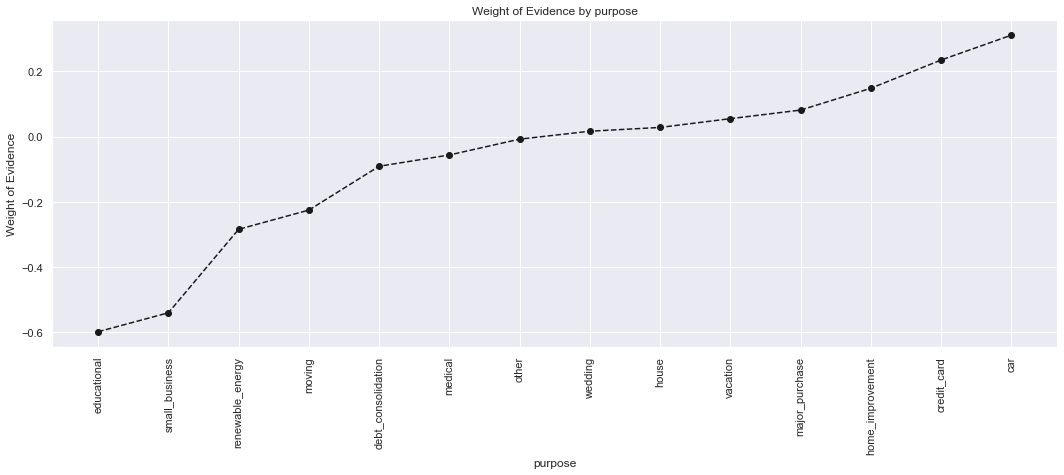

In [50]:
plot_by_woe(df_temp, 90)

Some of the values in this category can be combined as follows. 

In [51]:
df['purpose:educ__sm_b__wedd__ren_en__mov__house'] = \
sum([df['purpose:educational'], df['purpose:small_business'], \
     df['purpose:wedding'], df['purpose:renewable_energy'], \
     df['purpose:moving'], df['purpose:house']])
df['purpose:oth__med__vacation'] = sum([df['purpose:other'], \
    df['purpose:medical'], df['purpose:vacation']])
df['purpose:major_purch__car__home_impr'] = \
sum([df['purpose:major_purchase'], df['purpose:car'], \
     df['purpose:home_improvement']])

#### Initial List Status

In [52]:
df_temp = woe(df, 'initial_list_status')
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,725201,0.84246,0.32079,610956.00000,114245.00000,0.30914,0.40178,-0.26213,NaN,NaN,0.03763
1,w,1535467,0.88922,0.67921,1365368.00000,170099.00000,0.69086,0.59822,0.14399,0.04676,0.40612,0.03763


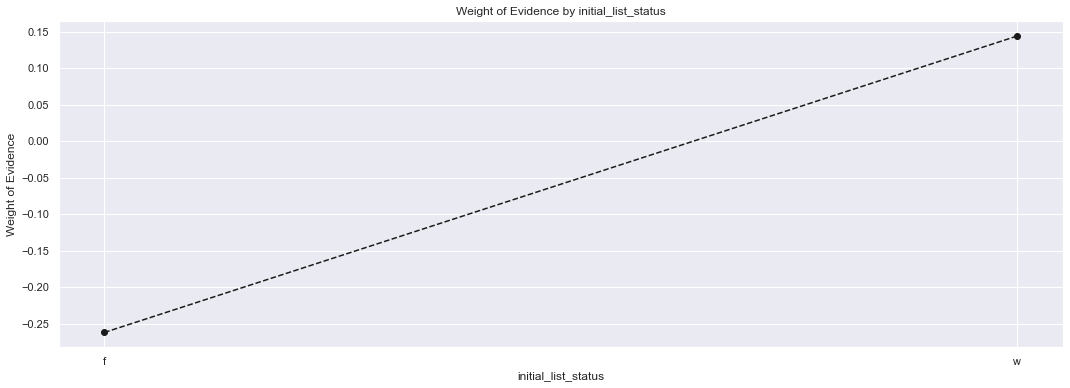

In [53]:
plot_by_woe(df_temp)

#### Term in Months

In [54]:
df['term_int'].unique()

array([36, 60], dtype=int64)

In [55]:
df_temp = woe(df, 'term_int').sort_values('term_int')
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
1,36,1609754,0.89273,0.71207,1437082.00000,172672.00000,0.72715,0.60726,0.18017,0.06430,0.54438,0.06526
0,60,650914,0.82844,0.28793,539242.00000,111672.00000,0.27285,0.39274,-0.36421,NaN,NaN,0.06526


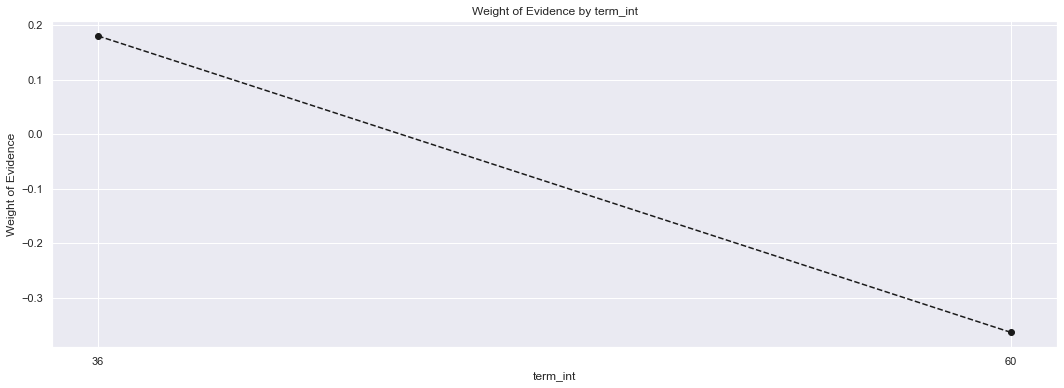

In [56]:
plot_by_woe(df_temp)

In [57]:
df['term:36'] = np.where((df['term_int'] == 36), 1, 0)
df['term:60'] = np.where((df['term_int'] == 60), 1, 0)

#### Employed Length in Years

In [58]:
df['emp_len_int'].unique()

array([10.,  6.,  4.,  0.,  2.,  9.,  5.,  3.,  7.,  1.,  8.])

In [59]:
df_temp = woe(df, 'emp_len_int').sort_values('emp_len_int')
df_temp

,emp_len_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
1,0.00000,336895,0.86329,0.14902,290839.00000,46056.00000,0.14716,0.16197,-0.09590,0.00126,0.01062,0.00430
4,1.00000,148403,0.86958,0.06565,129049.00000,19354.00000,0.06530,0.06807,-0.04152,0.00103,0.00902,0.00430
6,2.00000,203677,0.87446,0.09010,178107.00000,25570.00000,0.09012,0.08993,0.00216,0.00074,0.00673,0.00430
5,3.00000,180753,0.87372,0.07996,157927.00000,22826.00000,0.07991,0.08028,-0.00458,0.00413,0.03694,0.00430
9,4.00000,136605,0.87599,0.06043,119665.00000,16940.00000,0.06055,0.05958,0.01621,0.00095,0.00871,0.00430
7,5.00000,139698,0.87481,0.06180,122209.00000,17489.00000,0.06184,0.06151,0.00535,0.00035,0.00320,0.00430
8,6.00000,102628,0.87504,0.04540,89804.00000,12824.00000,0.04544,0.04510,0.00750,0.00024,0.00215,0.00430
3,7.00000,92695,0.86856,0.04100,80511.00000,12184.00000,0.04074,0.04285,-0.05054,0.00218,0.01897,0.00430
0,8.00000,91914,0.86203,0.04066,79233.00000,12681.00000,0.04009,0.04460,-0.10652,NaN,NaN,0.00430
2,9.00000,79395,0.86638,0.03512,68786.00000,10609.00000,0.03481,0.03731,-0.06951,0.00308,0.02639,0.00430


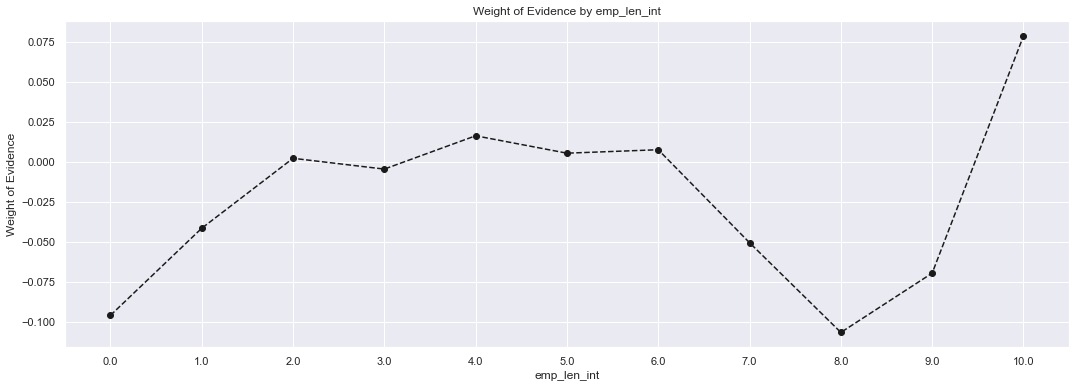

In [60]:
plot_by_woe(df_temp)

Based on Weight of Evidence values, the following categories can be made.

In [61]:
df['emp_length:0'] = np.where(df['emp_len_int'].isin([0]), 1, 0)
df['emp_length:1'] = np.where(df['emp_len_int'].isin([1]), 1, 0)
df['emp_length:2-4'] = np.where(df['emp_len_int'].isin(range(2, 5)), 1, 0)
df['emp_length:5-6'] = np.where(df['emp_len_int'].isin(range(5, 7)), 1, 0)
df['emp_length:7-9'] = np.where(df['emp_len_int'].isin(range(7, 10)), 1, 0)
df['emp_length:10'] = np.where(df['emp_len_int'].isin([10]), 1, 0)

#### Months since Issue Date

In [62]:
df['mths_since_issue_d'].unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  24.,
        25.,  26.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  21.,  22.,  23.,  15.,  16.,  17.,  18.,  19.,
        20.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
        70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,
        81.,  82.,  83.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
        91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101.,
       102., 103., 104., 105., 106., 107., 108., 109., 110., 111., 112.,
       113., 114., 115., 116., 117., 118., 119., 120., 121., 122., 123.,
       124., 125., 126., 127., 128., 129., 130., 131., 132., 133., 134.,
       135., 136., 137., 138.,  12.,  13.,  14.])

In [63]:
df['mths_since_issue_d_factor'] = pd.cut(df['mths_since_issue_d'], 50)

In [64]:
df['mths_since_issue_d_factor'].head()

0    (-0.138, 2.76]
1    (-0.138, 2.76]
2    (-0.138, 2.76]
3    (-0.138, 2.76]
4    (-0.138, 2.76]
Name: mths_since_issue_d_factor, dtype: category
Categories (50, interval[float64, right]): [(-0.138, 2.76] < (2.76, 5.52] < (5.52, 8.28] < (8.28, 11.04] ... (126.96, 129.72] < (129.72, 132.48] < (132.48, 135.24] < (135.24, 138.0]]

In [65]:
df_temp = woe(df, 'mths_since_issue_d_factor').sort_values('mths_since_issue_d_factor')
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
49,"(-0.138, 2.76]",128412,0.99578,0.05680,127870.00000,542.00000,0.06470,0.00191,3.52469,0.01213,1.36647,0.54175
48,"(2.76, 5.52]",128194,0.98365,0.05671,126098.00000,2096.00000,0.06380,0.00737,2.15822,0.02182,0.87012,0.54175
47,"(5.52, 8.28]",130772,0.96183,0.05785,125781.00000,4991.00000,0.06364,0.01755,1.28810,0.01589,0.36480,0.54175
46,"(8.28, 11.04]",107864,0.94594,0.04771,102033.00000,5831.00000,0.05163,0.02051,0.92330,0.01791,0.30522,0.54175
45,"(11.04, 13.8]",80497,0.92803,0.03561,74704.00000,5793.00000,0.03780,0.02037,0.61807,0.02106,0.27967,0.54175
...,...,...,...,...,...,...,...,...,...,...,...,...
3,"(124.2, 126.96]",265,0.80377,0.00012,213.00000,52.00000,0.00011,0.00018,-0.52876,0.03187,0.19094,0.54175
2,"(126.96, 129.72]",776,0.77191,0.00034,599.00000,177.00000,0.00030,0.00062,-0.71970,0.01712,0.09479,0.54175
1,"(129.72, 132.48]",783,0.75479,0.00035,591.00000,192.00000,0.00030,0.00068,-0.81449,0.05479,0.27702,0.54175
0,"(132.48, 135.24]",270,0.70000,0.00012,189.00000,81.00000,0.00010,0.00028,-1.09151,NaN,NaN,0.54175


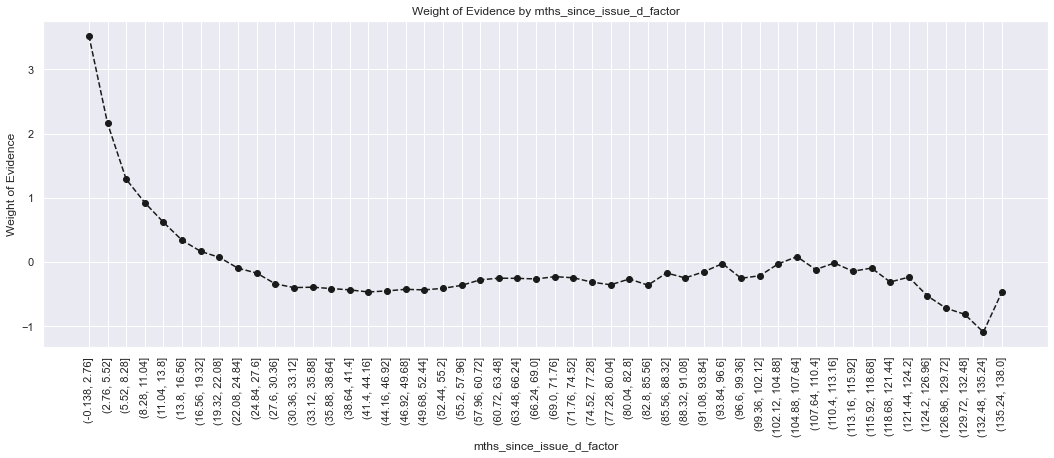

In [66]:
plot_by_woe(df_temp, 90)

The following categories can be made.

In [67]:
df['mths_since_issue_d:<38'] = np.where(df['mths_since_issue_d'].isin(range(38)), 1, 0)
df['mths_since_issue_d:38-39'] = np.where(df['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df['mths_since_issue_d:40-41'] = np.where(df['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df['mths_since_issue_d:42-48'] = np.where(df['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df['mths_since_issue_d:49-52'] = np.where(df['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df['mths_since_issue_d:53-64'] = np.where(df['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df['mths_since_issue_d:65-84'] = np.where(df['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df['mths_since_issue_d:>84'] = np.where(df['mths_since_issue_d'].isin(range(85, int(df['mths_since_issue_d'].max()))), 1, 0)

#### Interest Rate

In [68]:
df['int_rate_factor'] = pd.cut(df['int_rate'], 50)
df_temp = woe(df, 'int_rate_factor').sort_values('int_rate_factor')
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
48,"(5.284, 5.824]",56767,0.97965,0.02511,55612.00000,1155.00000,0.02814,0.00406,1.93549,0.00464,0.21010,0.47098
49,"(5.824, 6.337]",48995,0.98273,0.02167,48149.00000,846.00000,0.02436,0.00298,2.10273,0.00308,0.16724,0.47098
47,"(6.337, 6.851]",51752,0.97502,0.02289,50459.00000,1293.00000,0.02553,0.00455,1.72539,0.00919,0.32276,0.47098
46,"(6.851, 7.364]",95182,0.96582,0.04210,91929.00000,3253.00000,0.04652,0.01144,1.40263,0.00425,0.12169,0.47098
45,"(7.364, 7.878]",54516,0.96157,0.02411,52421.00000,2095.00000,0.02652,0.00737,1.28094,0.01133,0.27027,0.47098
...,...,...,...,...,...,...,...,...,...,...,...,...
13,"(28.422, 28.936]",4216,0.73861,0.00186,3114.00000,1102.00000,0.00158,0.00388,-0.90003,0.00213,0.01101,0.47098
0,"(28.936, 29.449]",284,0.45775,0.00013,130.00000,154.00000,0.00007,0.00054,-2.10823,NaN,NaN,0.47098
7,"(29.449, 29.963]",2326,0.70980,0.00103,1651.00000,675.00000,0.00084,0.00237,-1.04439,0.00713,0.03436,0.47098
14,"(29.963, 30.476]",1877,0.73948,0.00083,1388.00000,489.00000,0.00070,0.00172,-0.89555,0.00086,0.00448,0.47098


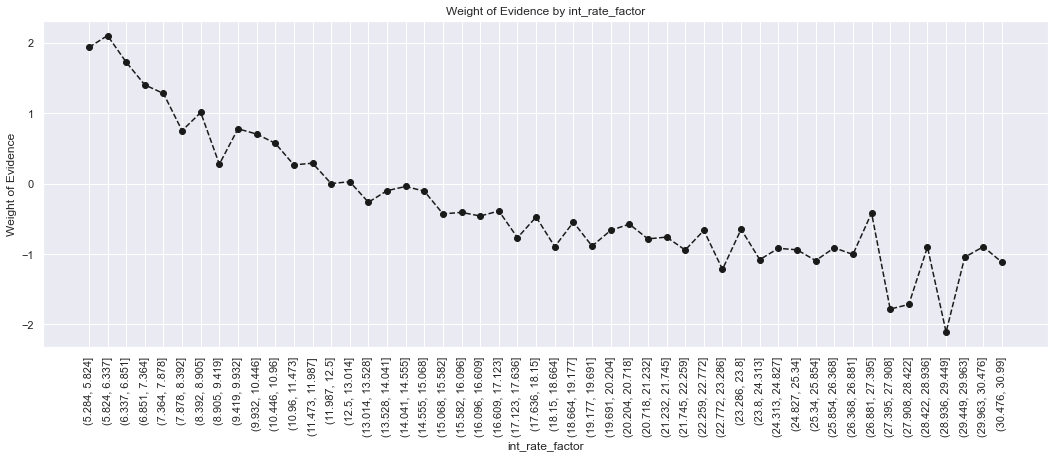

In [69]:
plot_by_woe(df_temp, 90)

In [70]:
df['int_rate:<9.548'] = np.where((df['int_rate'] <= 9.548), 1, 0)
df['int_rate:9.548-12.025'] = np.where((df['int_rate'] > 9.548) & (df['int_rate'] <= 12.025), 1, 0)
df['int_rate:12.025-15.74'] = np.where((df['int_rate'] > 12.025) & (df['int_rate'] <= 15.74), 1, 0)
df['int_rate:15.74-20.281'] = np.where((df['int_rate'] > 15.74) & (df['int_rate'] <= 20.281), 1, 0)
df['int_rate:>20.281'] = np.where((df['int_rate'] > 20.281), 1, 0)

#### Funded Amount

In [71]:
df['funded_amnt_factor'] = pd.cut(df['funded_amnt'], 50)
df_temp = woe(df, 'funded_amnt_factor').sort_values('funded_amnt_factor')
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
43,"(460.5, 1290.0]",14197,0.91900,0.00628,13047.00000,1150.00000,0.00660,0.00404,0.48999,0.01019,0.12965,0.04154
42,"(1290.0, 2080.0]",31921,0.90881,0.01412,29010.00000,2911.00000,0.01468,0.01024,0.36033,0.00965,0.11131,0.04154
40,"(2080.0, 2870.0]",27996,0.89841,0.01238,25152.00000,2844.00000,0.01273,0.01000,0.24092,0.00329,0.03555,0.04154
41,"(2870.0, 3660.0]",63303,0.89915,0.02800,56919.00000,6384.00000,0.02880,0.02245,0.24903,0.00074,0.00811,0.04154
38,"(3660.0, 4450.0]",49691,0.89344,0.02198,44396.00000,5295.00000,0.02246,0.01862,0.18758,0.00022,0.00229,0.04154
...,...,...,...,...,...,...,...,...,...,...,...,...
44,"(36050.0, 36840.0]",652,0.94325,0.00029,615.00000,37.00000,0.00031,0.00013,0.87190,0.02425,0.38191,0.04154
47,"(36840.0, 37630.0]",1238,0.95073,0.00055,1177.00000,61.00000,0.00060,0.00021,1.02104,0.00348,0.07188,0.04154
49,"(37630.0, 38420.0]",1523,0.95798,0.00067,1459.00000,64.00000,0.00074,0.00023,1.18781,0.00227,0.05491,0.04154
48,"(38420.0, 39210.0]",858,0.95571,0.00038,820.00000,38.00000,0.00041,0.00013,1.13291,0.00498,0.11187,0.04154


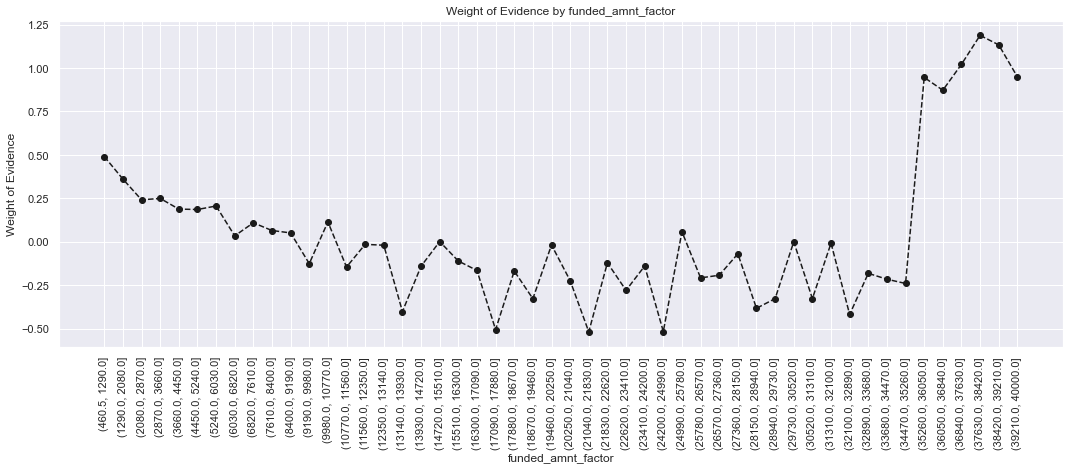

In [72]:
plot_by_woe(df_temp, 90)

#### Months since Earliest Credit Line

In [73]:
df['mths_since_earliest_cr_line_factor'] = \
pd.cut(df['mths_since_earliest_cr_line'], 50)
df_temp = woe(df, 'mths_since_earliest_cr_line_factor').\
sort_values('mths_since_earliest_cr_line_factor')
df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
37,"(-1.029, 20.58]",29,0.89655,0.00001,26.00000,3.00000,0.00001,0.00001,0.22068,0.00753,0.07867,inf
40,"(20.58, 41.16]",851,0.98825,0.00038,841.00000,10.00000,0.00043,0.00004,2.49320,0.04362,1.59535,inf
39,"(41.16, 61.74]",22483,0.94462,0.00995,21238.00000,1245.00000,0.01075,0.00438,0.89785,0.04429,0.63565,inf
38,"(61.74, 82.32]",46829,0.90034,0.02071,42162.00000,4667.00000,0.02133,0.01641,0.26219,0.00379,0.04152,inf
29,"(82.32, 102.9]",65864,0.88317,0.02913,58169.00000,7695.00000,0.02943,0.02706,0.08397,0.00003,0.00026,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
44,"(926.1, 946.68]",1,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,inf,0.00000,NaN,inf
47,"(946.68, 967.26]",0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
48,"(967.26, 987.84]",0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
49,"(987.84, 1008.42]",0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


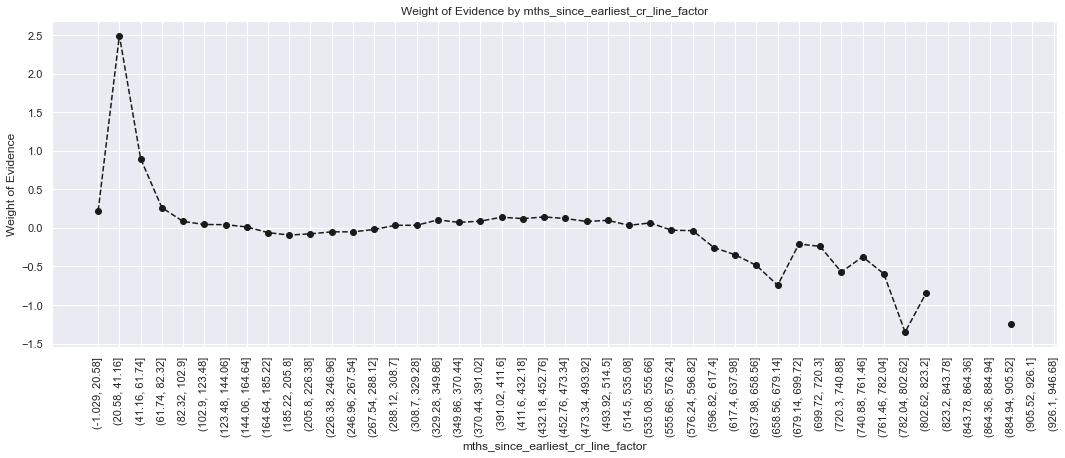

In [74]:
plot_by_woe(df_temp, 90)

In [75]:
df['mths_since_earliest_cr_line:<140'] = np.where(df['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df['mths_since_earliest_cr_line:141-164'] = np.where(df['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df['mths_since_earliest_cr_line:165-247'] = np.where(df['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df['mths_since_earliest_cr_line:248-270'] = np.where(df['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df['mths_since_earliest_cr_line:271-352'] = np.where(df['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df['mths_since_earliest_cr_line:>352'] = np.where(df['mths_since_earliest_cr_line'].isin(range(353, int(df['mths_since_earliest_cr_line'].max()))), 1, 0)

#### Delinquency in Past 2 Years

In [76]:
df_temp = woe(df, 'delinq_2yrs').sort_values('delinq_2yrs')
df_temp

C:\Users\tejas\anaconda3\envs\coursera\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
23,0.00000,1839137,0.87752,0.81354,1613888.00000,225249.00000,0.81661,0.79217,0.03039,0.01086,0.09739,inf
21,1.00000,281353,0.86442,0.12446,243207.00000,38146.00000,0.12306,0.13415,-0.08632,0.00830,0.06910,inf
19,2.00000,81289,0.85388,0.03596,69411.00000,11878.00000,0.03512,0.04177,-0.17345,0.00400,0.03171,inf
14,3.00000,29542,0.84707,0.01307,25024.00000,4518.00000,0.01266,0.01589,-0.22704,0.00019,0.00145,inf
13,4.00000,13179,0.84688,0.00583,11161.00000,2018.00000,0.00565,0.00710,-0.22849,0.00458,0.03489,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
33,35.00000,1,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,inf,0.00000,NaN,inf
1,36.00000,1,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,-inf,0.00000,NaN,inf
34,39.00000,1,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,inf,0.00000,NaN,inf
28,42.00000,1,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,inf,0.00000,NaN,inf


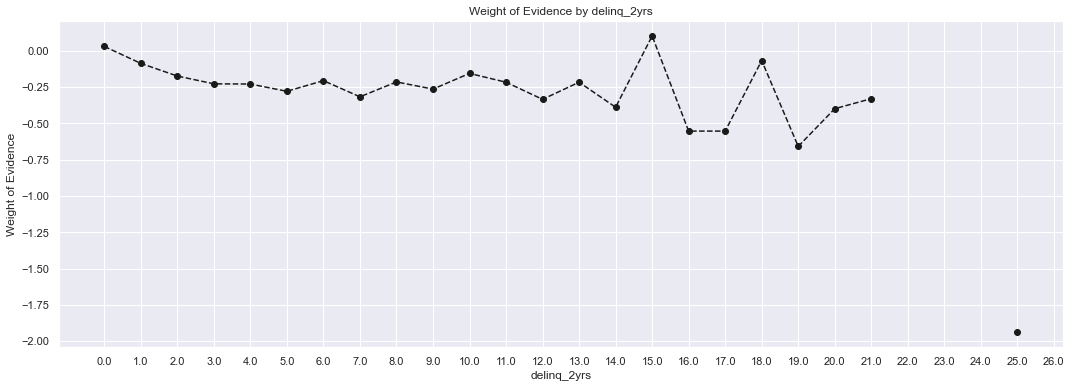

In [77]:
plot_by_woe(df_temp)

In [78]:
df['delinq_2yrs:0'] = np.where((df['delinq_2yrs'] == 0), 1, 0)
df['delinq_2yrs:1-3'] = np.where((df['delinq_2yrs'] >= 1) & (df['delinq_2yrs'] <= 3), 1, 0)
df['delinq_2yrs:>=4'] = np.where((df['delinq_2yrs'] >= 9), 1, 0)

#### Inquiries in Last 6 Months

In [79]:
df_temp = woe(df, 'inq_last_6mths').sort_values('inq_last_6mths')
df_temp

C:\Users\tejas\anaconda3\envs\coursera\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
21,0.00000,1381752,0.89380,0.61121,1235004.00000,146748.00000,0.62490,0.51609,0.19130,0.01880,0.18420,inf
19,1.00000,584390,0.85813,0.25850,501481.00000,82909.00000,0.25374,0.29158,-0.13899,0.02965,0.22492,inf
18,2.00000,200212,0.82848,0.08856,165872.00000,34340.00000,0.08393,0.12077,-0.36390,0.02848,0.18861,inf
16,3.00000,69009,0.79520,0.03053,54876.00000,14133.00000,0.02777,0.04970,-0.58225,0.03542,0.20508,inf
15,4.00000,17380,0.75978,0.00769,13205.00000,4175.00000,0.00668,0.01468,-0.78733,0.00978,0.05287,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
25,27.00000,1,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,inf,0.00000,NaN,inf
26,28.00000,1,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,inf,0.00000,NaN,inf
27,31.00000,1,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,inf,0.00000,NaN,inf
3,32.00000,1,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,-inf,0.00000,NaN,inf


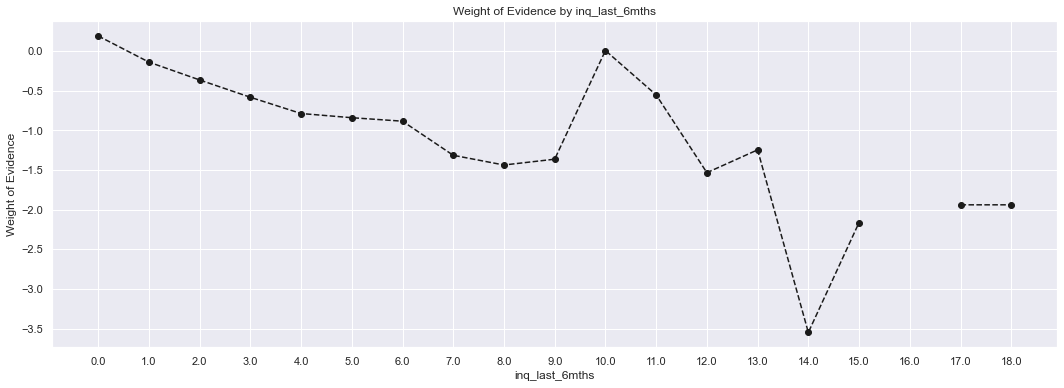

In [80]:
plot_by_woe(df_temp)

In [81]:
df['inq_last_6mths:0'] = np.where((df['inq_last_6mths'] == 0), 1, 0)
df['inq_last_6mths:1-2'] = np.where((df['inq_last_6mths'] >= 1) & (df['inq_last_6mths'] <= 2), 1, 0)
df['inq_last_6mths:3-6'] = np.where((df['inq_last_6mths'] >= 3) & (df['inq_last_6mths'] <= 6), 1, 0)
df['inq_last_6mths:>6'] = np.where((df['inq_last_6mths'] > 6), 1, 0)

#### Open Account

In [82]:
df_temp = woe(df, 'open_acc').sort_values('open_acc')
df_temp

,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
53,0.00000,85,0.88235,0.00004,75.00000,10.00000,0.00004,0.00004,0.07609,0.00183,0.01753,inf
62,1.00000,1644,0.89781,0.00073,1476.00000,168.00000,0.00075,0.00059,0.23432,0.00062,0.00677,inf
60,2.00000,10860,0.89705,0.00480,9742.00000,1118.00000,0.00493,0.00393,0.22610,0.00565,0.05978,inf
61,3.00000,32428,0.89719,0.01434,29094.00000,3334.00000,0.01472,0.01173,0.22755,0.00013,0.00145,inf
59,4.00000,67827,0.89140,0.03000,60461.00000,7366.00000,0.03059,0.02591,0.16631,0.00221,0.02262,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
71,91.00000,1,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,inf,0.00000,NaN,inf
70,93.00000,1,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,inf,0.00000,NaN,inf
69,94.00000,1,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,inf,0.00000,NaN,inf
82,97.00000,1,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,inf,0.00000,NaN,inf


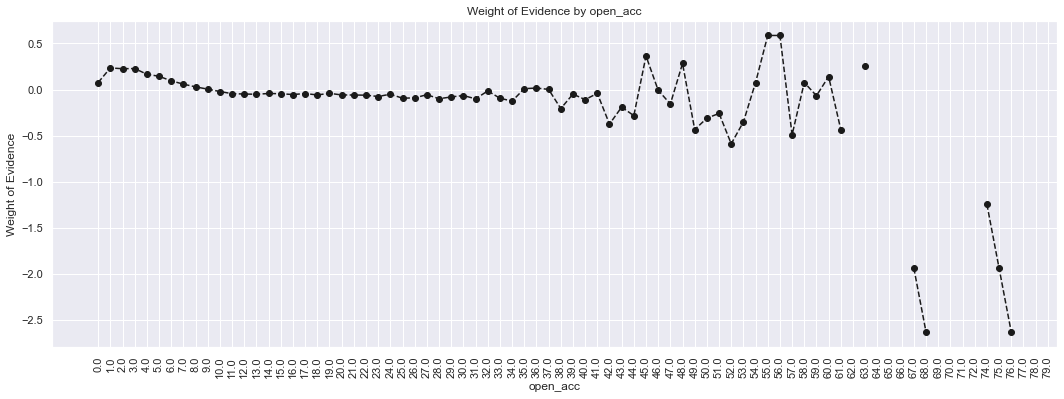

In [83]:
plot_by_woe(df_temp, 90)

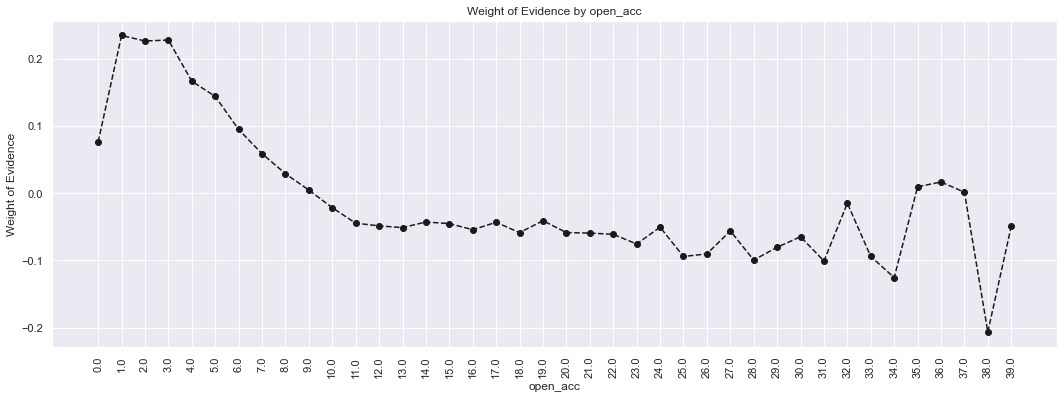

In [84]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)

In [85]:
df['open_acc:0'] = np.where((df['open_acc'] == 0), 1, 0)
df['open_acc:1-3'] = np.where((df['open_acc'] >= 1) & (df['open_acc'] <= 3), 1, 0)
df['open_acc:4-12'] = np.where((df['open_acc'] >= 4) & (df['open_acc'] <= 12), 1, 0)
df['open_acc:13-17'] = np.where((df['open_acc'] >= 13) & (df['open_acc'] <= 17), 1, 0)
df['open_acc:18-22'] = np.where((df['open_acc'] >= 18) & (df['open_acc'] <= 22), 1, 0)
df['open_acc:23-25'] = np.where((df['open_acc'] >= 23) & (df['open_acc'] <= 25), 1, 0)
df['open_acc:26-30'] = np.where((df['open_acc'] >= 26) & (df['open_acc'] <= 30), 1, 0)
df['open_acc:>=31'] = np.where((df['open_acc'] >= 31), 1, 0)

#### Derogatory Public Records

In [86]:
df_temp = woe(df, 'pub_rec').sort_values('pub_rec')
df_temp

C:\Users\tejas\anaconda3\envs\coursera\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
24,0.00000,1902787,0.87930,0.84169,1673130.00000,229657.00000,0.84659,0.80767,0.04706,0.00276,0.02577,inf
21,1.00000,305390,0.85081,0.13509,259828.00000,45562.00000,0.13147,0.16024,-0.19786,0.00303,0.02369,inf
11,2.00000,34154,0.82307,0.01511,28111.00000,6043.00000,0.01422,0.02125,-0.40155,0.02307,0.15097,inf
15,3.00000,10567,0.83259,0.00467,8798.00000,1769.00000,0.00445,0.00622,-0.33470,0.00501,0.03549,inf
12,4.00000,3872,0.82309,0.00171,3187.00000,685.00000,0.00161,0.00241,-0.40139,0.00002,0.00016,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
38,52.00000,1,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,inf,0.00000,NaN,inf
39,54.00000,1,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,inf,0.00000,NaN,inf
4,61.00000,2,0.50000,0.00000,1.00000,1.00000,0.00000,0.00000,-1.93881,0.50000,inf,inf
34,63.00000,1,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,inf,0.00000,NaN,inf


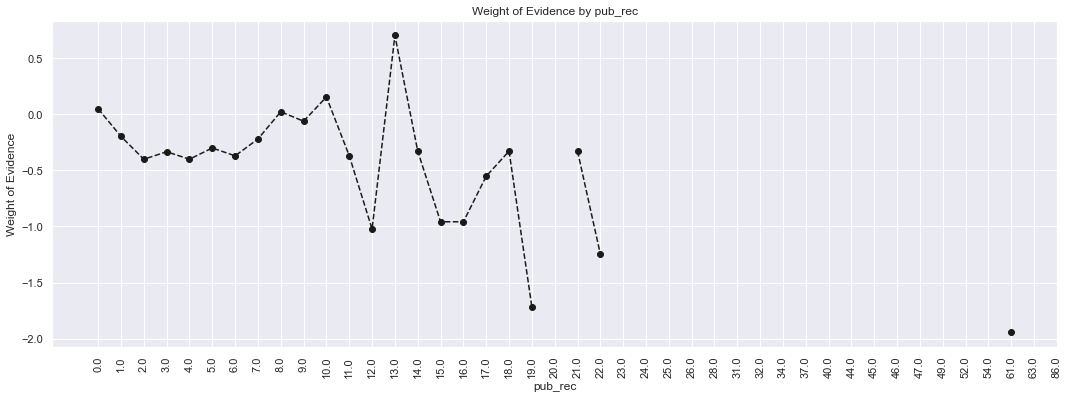

In [87]:
plot_by_woe(df_temp, 90)

In [88]:
df['pub_rec:0-2'] = np.where((df['pub_rec'] >= 0) & (df['pub_rec'] <= 2), 1, 0)
df['pub_rec:3-4'] = np.where((df['pub_rec'] >= 3) & (df['pub_rec'] <= 4), 1, 0)
df['pub_rec:>=5'] = np.where((df['pub_rec'] >= 5), 1, 0)

#### Total Credit Lines

In [89]:
df['total_acc_factor'] = pd.cut(df['total_acc'], 50)
df_temp = woe(df, 'total_acc_factor').sort_values('total_acc_factor')
df_temp

C:\Users\tejas\anaconda3\envs\coursera\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
38,"(-0.176, 3.52]",5627,0.90528,0.00249,5094.00000,533.00000,0.00258,0.00187,0.31849,0.01639,0.17786,inf
36,"(3.52, 7.04]",82183,0.88796,0.03635,72975.00000,9208.00000,0.03692,0.03238,0.13124,0.00456,0.04502,inf
34,"(7.04, 10.56]",138704,0.88158,0.06136,122279.00000,16425.00000,0.06187,0.05776,0.06869,0.00385,0.03634,inf
33,"(10.56, 14.08]",269744,0.87774,0.11932,236764.00000,32980.00000,0.11980,0.11599,0.03235,0.00038,0.00351,inf
30,"(14.08, 17.6]",238179,0.87595,0.10536,208632.00000,29547.00000,0.10557,0.10391,0.01578,0.00052,0.00479,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
47,"(158.4, 161.92]",2,1.00000,0.00000,2.00000,0.00000,0.00000,0.00000,inf,0.00000,NaN,inf
48,"(161.92, 165.44]",2,1.00000,0.00000,2.00000,0.00000,0.00000,0.00000,inf,0.00000,NaN,inf
49,"(165.44, 168.96]",0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1,"(168.96, 172.48]",1,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,-inf,0.00000,NaN,inf


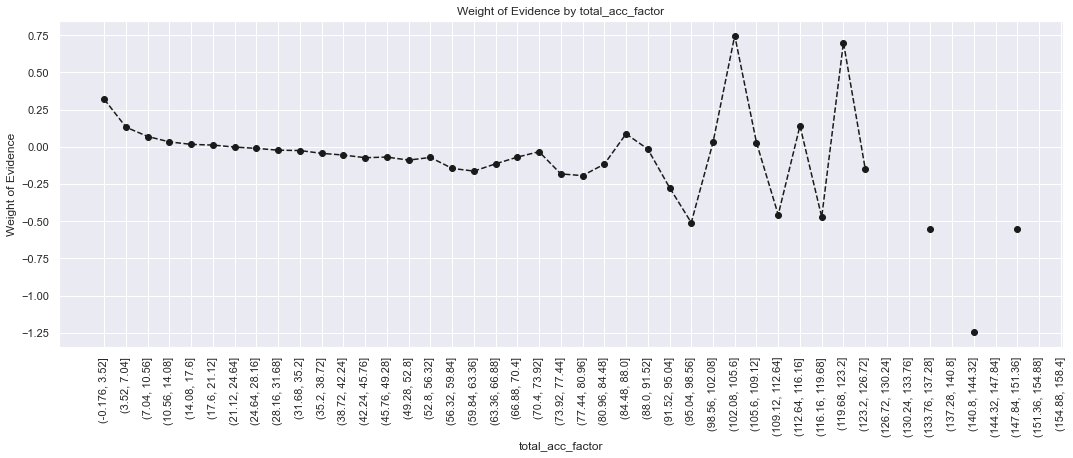

In [90]:
plot_by_woe(df_temp, 90)

In [91]:
df['total_acc:<=27'] = np.where((df['total_acc'] <= 27), 1, 0)
df['total_acc:28-51'] = np.where((df['total_acc'] >= 28) & (df['total_acc'] <= 51), 1, 0)
df['total_acc:>=52'] = np.where((df['total_acc'] >= 52), 1, 0)

#### Total Delinquency Accounts

In [92]:
df_temp = woe(df, 'acc_now_delinq').sort_values('acc_now_delinq')
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
6,0.00000,2251886,0.87439,0.99612,1969016.00000,282870.00000,0.99630,0.99482,0.00149,0.04103,0.33072,inf
5,1.00000,8293,0.83335,0.00367,6911.00000,1382.00000,0.00350,0.00486,-0.32923,0.01388,0.09677,inf
4,2.00000,421,0.81948,0.00019,345.00000,76.00000,0.00017,0.00027,-0.42600,0.00130,0.00873,inf
2,3.00000,50,0.76000,0.00002,38.00000,12.00000,0.00002,0.00004,-0.78613,0.09333,0.45953,inf
3,4.00000,11,0.81818,0.00000,9.00000,2.00000,0.00000,0.00001,-0.43473,0.05818,0.35140,inf
1,5.00000,3,0.66667,0.00000,2.00000,1.00000,0.00000,0.00000,-1.24566,0.16667,0.69315,inf
0,6.00000,2,0.50000,0.00000,1.00000,1.00000,0.00000,0.00000,-1.93881,NaN,NaN,inf
7,7.00000,1,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,inf,0.12561,inf,inf
8,14.00000,1,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,inf,0.00000,NaN,inf


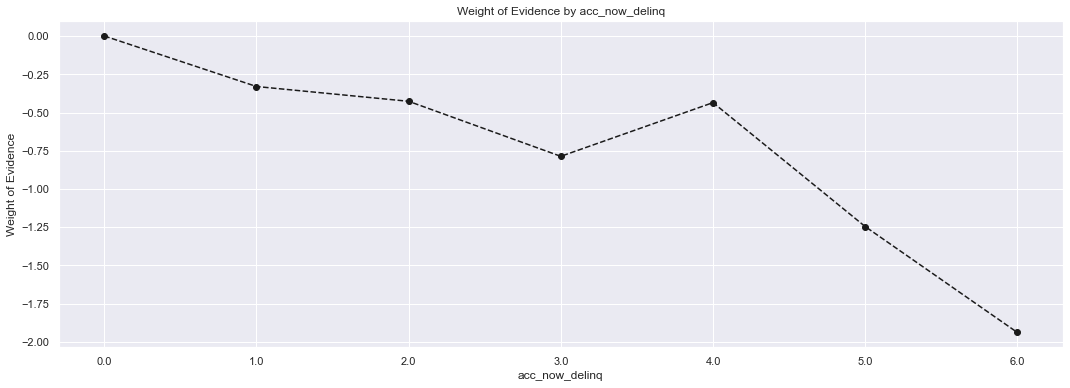

In [93]:
plot_by_woe(df_temp)

In [94]:
df['acc_now_delinq:0'] = np.where((df['acc_now_delinq'] == 0), 1, 0)
df['acc_now_delinq:>=1'] = np.where((df['acc_now_delinq'] >= 1), 1, 0)

#### Total Revolving High Limit

In [95]:
df['total_rev_hi_lim_factor'] = pd.cut(df['total_rev_hi_lim'], 2000)
df_temp = woe(df, 'total_rev_hi_lim_factor').\
sort_values('total_rev_hi_lim_factor')
df_temp

C:\Users\tejas\anaconda3\envs\coursera\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
15,"(-9999.999, 5000.0]",85664,0.84991,0.03789,72807.00000,12857.00000,0.03684,0.04522,-0.20489,0.01658,0.12449,inf
16,"(5000.0, 9999.999]",235637,0.85129,0.10423,200595.00000,35042.00000,0.10150,0.12324,-0.19407,0.00137,0.01082,inf
17,"(9999.999, 14999.998]",291343,0.85360,0.12887,248690.00000,42653.00000,0.12583,0.15000,-0.17570,0.00231,0.01837,inf
18,"(14999.998, 19999.998]",281460,0.85660,0.12450,241100.00000,40360.00000,0.12199,0.14194,-0.15144,0.00301,0.02426,inf
22,"(19999.998, 24999.997]",243944,0.86306,0.10791,210538.00000,33406.00000,0.10653,0.11748,-0.09788,0.00592,0.04917,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1996,"(9974999.002, 9979999.002]",0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(9979999.002, 9984999.002]",0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(9984999.002, 9989999.001]",0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1999,"(9989999.001, 9994999.0]",0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


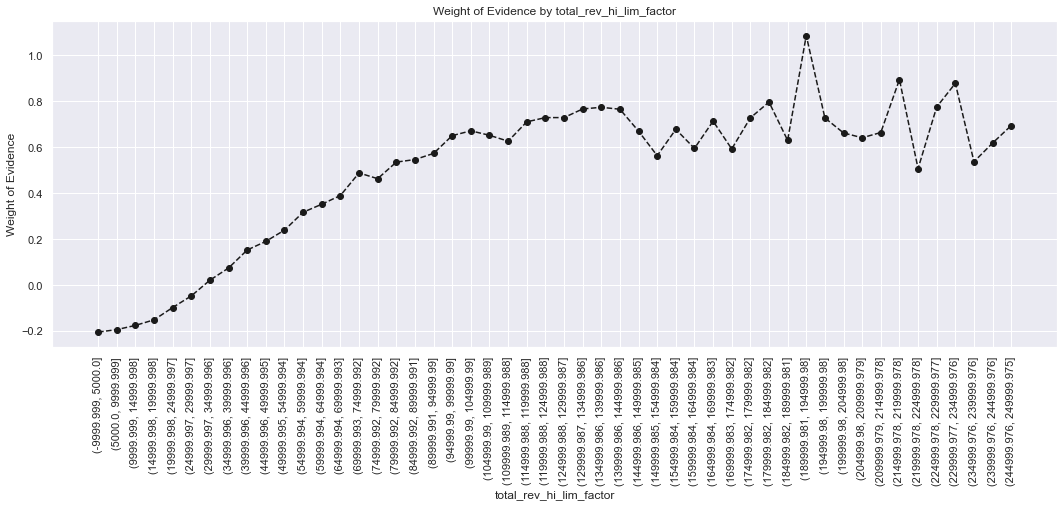

In [96]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [97]:
df['total_rev_hi_lim:<=5K'] = np.where((df['total_rev_hi_lim'] <= 5000), 1, 0)
df['total_rev_hi_lim:5K-10K'] = np.where((df['total_rev_hi_lim'] > 5000) & (df['total_rev_hi_lim'] <= 10000), 1, 0)
df['total_rev_hi_lim:10K-20K'] = np.where((df['total_rev_hi_lim'] > 10000) & (df['total_rev_hi_lim'] <= 20000), 1, 0)
df['total_rev_hi_lim:20K-30K'] = np.where((df['total_rev_hi_lim'] > 20000) & (df['total_rev_hi_lim'] <= 30000), 1, 0)
df['total_rev_hi_lim:30K-40K'] = np.where((df['total_rev_hi_lim'] > 30000) & (df['total_rev_hi_lim'] <= 40000), 1, 0)
df['total_rev_hi_lim:40K-55K'] = np.where((df['total_rev_hi_lim'] > 40000) & (df['total_rev_hi_lim'] <= 55000), 1, 0)
df['total_rev_hi_lim:55K-95K'] = np.where((df['total_rev_hi_lim'] > 55000) & (df['total_rev_hi_lim'] <= 95000), 1, 0)
df['total_rev_hi_lim:>95K'] = np.where((df['total_rev_hi_lim'] > 95000), 1, 0)

#### Installment

In [98]:
df['installment_factor'] = pd.cut(df['installment'], 50)
df_temp = woe(df, 'installment_factor').\
sort_values('installment_factor')
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
47,"(3.215, 39.228]",10648,0.91980,0.00471,9794.00000,854.00000,0.00496,0.00300,0.50078,0.00826,0.10705,inf
46,"(39.228, 73.526]",36580,0.91154,0.01618,33344.00000,3236.00000,0.01687,0.01138,0.39373,0.00675,0.08099,inf
45,"(73.526, 107.824]",60620,0.90478,0.02682,54848.00000,5772.00000,0.02775,0.02030,0.31274,0.00325,0.03718,inf
42,"(107.824, 142.122]",69973,0.89978,0.03095,62960.00000,7013.00000,0.03186,0.02466,0.25592,0.00257,0.02818,inf
41,"(142.122, 176.42]",119792,0.89721,0.05299,107478.00000,12314.00000,0.05438,0.04331,0.22774,0.00137,0.01475,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
0,"(1548.34, 1582.638]",33,0.63636,0.00001,21.00000,12.00000,0.00001,0.00004,-1.37919,NaN,NaN,inf
43,"(1582.638, 1616.936]",30,0.90000,0.00001,27.00000,3.00000,0.00001,0.00001,0.25842,0.00022,0.00249,inf
49,"(1616.936, 1651.234]",13,1.00000,0.00001,13.00000,0.00000,0.00001,0.00000,inf,0.00000,NaN,inf
48,"(1651.234, 1685.532]",1,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,inf,0.08020,inf,inf


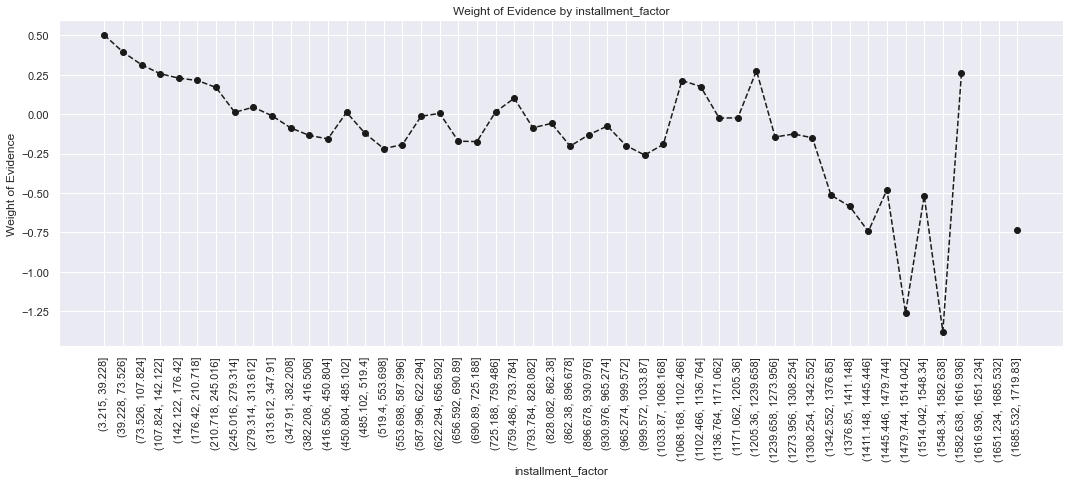

In [99]:
plot_by_woe(df_temp, 90)

#### Annual Income

In [100]:
df['annual_inc_factor'] = pd.cut(df['annual_inc'], 100)
df_temp = woe(df, 'annual_inc_factor').sort_values('annual_inc_factor')
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
3,"(-110000.0, 1100000.0]",2260170,0.87421,0.99978,1975865.00000,284305.00000,0.99977,0.99986,-0.00010,0.00579,0.05164,inf
7,"(1100000.0, 2200000.0]",306,0.94444,0.00014,289.00000,17.00000,0.00015,0.00006,0.89440,0.01587,0.26826,inf
1,"(2200000.0, 3300000.0]",42,0.85714,0.00002,36.00000,6.00000,0.00002,0.00002,-0.14705,0.08791,0.58779,inf
2,"(3300000.0, 4400000.0]",38,0.86842,0.00002,33.00000,5.00000,0.00002,0.00002,-0.05174,0.01128,0.09531,inf
4,"(4400000.0, 5500000.0]",28,0.89286,0.00001,25.00000,3.00000,0.00001,0.00001,0.18145,0.01865,0.18155,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
96,"(104500000.0, 105600000.0]",0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
97,"(105600000.0, 106700000.0]",0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
98,"(106700000.0, 107800000.0]",0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
99,"(107800000.0, 108900000.0]",0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


Initial examination shows that there are too few individuals with large income and too many with small income. Hence, it's best to have one category for more than 150K, and to apply the approach to determine the categories of everyone with 140k or less.

In [101]:
df_temp = df.loc[df['annual_inc'] <= 140000, : ]
df_temp["annual_inc_factor"] = pd.cut(df_temp['annual_inc'], 50)
df_temp = woe(df_temp, 'annual_inc_factor').sort_values('annual_inc_factor')
df_temp

C:\Users\tejas\AppData\Local\Temp\ipykernel_2452\347508063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["annual_inc_factor"] = pd.cut(df_temp['annual_inc'], 50)


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
49,"(-140.0, 2800.0]",2105,0.94394,0.00101,1987.00000,118.00000,0.00109,0.00044,0.91426,0.00478,0.08690,0.02384
48,"(2800.0, 5600.0]",526,0.93916,0.00025,494.00000,32.00000,0.00027,0.00012,0.82736,0.02614,0.38562,0.02384
39,"(5600.0, 8400.0]",906,0.90066,0.00043,816.00000,90.00000,0.00045,0.00033,0.29517,0.00176,0.01948,0.02384
14,"(8400.0, 11200.0]",3682,0.86040,0.00177,3168.00000,514.00000,0.00174,0.00191,-0.09080,0.00004,0.00035,0.02384
11,"(11200.0, 14000.0]",6369,0.85712,0.00305,5459.00000,910.00000,0.00301,0.00338,-0.11786,0.00162,0.01317,0.02384
...,...,...,...,...,...,...,...,...,...,...,...,...
44,"(126000.0, 128800.0]",5385,0.90882,0.00258,4894.00000,491.00000,0.00270,0.00183,0.38989,0.00207,0.02469,0.02384
41,"(128800.0, 131600.0]",21888,0.90543,0.01050,19818.00000,2070.00000,0.01091,0.00769,0.34961,0.00029,0.00334,0.02384
47,"(131600.0, 134400.0]",5542,0.91303,0.00266,5060.00000,482.00000,0.00279,0.00179,0.44174,0.00185,0.02306,0.02384
45,"(134400.0, 137200.0]",13575,0.91020,0.00651,12356.00000,1219.00000,0.00680,0.00453,0.40668,0.00138,0.01679,0.02384


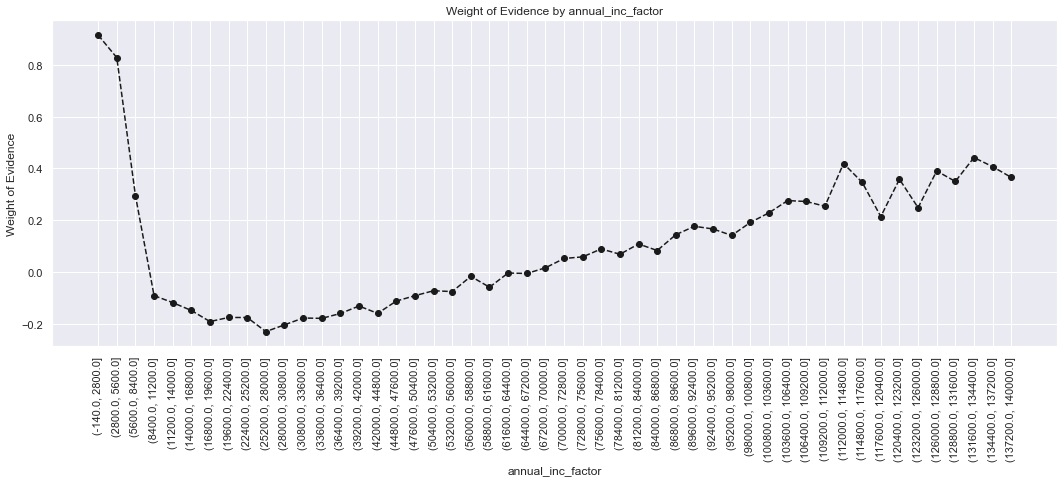

In [102]:
plot_by_woe(df_temp, 90)

In [103]:
df['annual_inc:<20K'] = np.where((df['annual_inc'] <= 20000), 1, 0)
df['annual_inc:20K-30K'] = np.where((df['annual_inc'] > 20000) & (df['annual_inc'] <= 30000), 1, 0)
df['annual_inc:30K-40K'] = np.where((df['annual_inc'] > 30000) & (df['annual_inc'] <= 40000), 1, 0)
df['annual_inc:40K-50K'] = np.where((df['annual_inc'] > 40000) & (df['annual_inc'] <= 50000), 1, 0)
df['annual_inc:50K-60K'] = np.where((df['annual_inc'] > 50000) & (df['annual_inc'] <= 60000), 1, 0)
df['annual_inc:60K-70K'] = np.where((df['annual_inc'] > 60000) & (df['annual_inc'] <= 70000), 1, 0)
df['annual_inc:70K-80K'] = np.where((df['annual_inc'] > 70000) & (df['annual_inc'] <= 80000), 1, 0)
df['annual_inc:80K-90K'] = np.where((df['annual_inc'] > 80000) & (df['annual_inc'] <= 90000), 1, 0)
df['annual_inc:90K-100K'] = np.where((df['annual_inc'] > 90000) & (df['annual_inc'] <= 100000), 1, 0)
df['annual_inc:100K-120K'] = np.where((df['annual_inc'] > 100000) & (df['annual_inc'] <= 120000), 1, 0)
df['annual_inc:120K-140K'] = np.where((df['annual_inc'] > 120000) & (df['annual_inc'] <= 140000), 1, 0)
df['annual_inc:>140K'] = np.where((df['annual_inc'] > 140000), 1, 0)

#### Months since Last Delinquency

In [104]:
df_temp = df[pd.notnull(df['mths_since_last_delinq'])]
df_temp['mths_since_last_delinq_factor'] = pd.cut(df_temp['mths_since_last_delinq'], 50)
df_temp = woe(df_temp, 'mths_since_last_delinq_factor').\
sort_values('mths_since_last_delinq_factor')
df_temp

C:\Users\tejas\AppData\Local\Temp\ipykernel_2452\1114147262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['mths_since_last_delinq_factor'] = pd.cut(df_temp['mths_since_last_delinq'], 50)
C:\Users\tejas\anaconda3\envs\coursera\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
6,"(-0.226, 4.52]",48185,0.85180,0.04372,41044.00000,7141.00000,0.04295,0.04875,-0.12684,0.03362,0.24471,inf
7,"(4.52, 9.04]",98015,0.85659,0.08893,83959.00000,14056.00000,0.08785,0.09597,-0.08836,0.00479,0.03849,inf
9,"(9.04, 13.56]",79968,0.86071,0.07256,68829.00000,11139.00000,0.07202,0.07605,-0.05446,0.00356,0.02941,inf
11,"(13.56, 18.08]",95903,0.86150,0.08701,82620.00000,13283.00000,0.08645,0.09069,-0.04787,0.00034,0.00286,inf
16,"(18.08, 22.6]",74080,0.86840,0.06721,64331.00000,9749.00000,0.06731,0.06656,0.01124,0.00018,0.00156,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
46,"(203.4, 207.92]",0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
47,"(207.92, 212.44]",0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
48,"(212.44, 216.96]",0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
49,"(216.96, 221.48]",0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


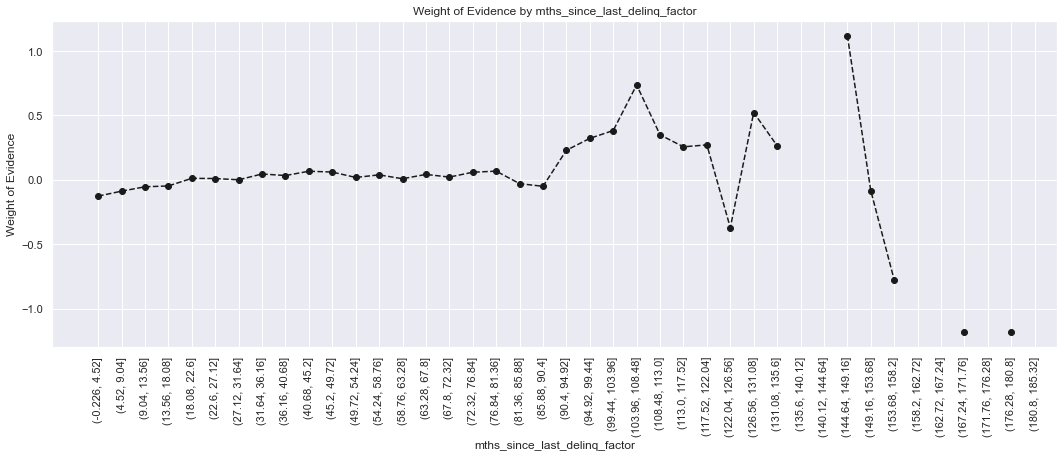

In [105]:
plot_by_woe(df_temp, 90)

In [106]:
df['mths_since_last_delinq:Missing'] = np.where((df['mths_since_last_delinq'].isnull()), 1, 0)
df['mths_since_last_delinq:0-3'] = np.where((df['mths_since_last_delinq'] >= 0) & (df['mths_since_last_delinq'] <= 3), 1, 0)
df['mths_since_last_delinq:4-30'] = np.where((df['mths_since_last_delinq'] >= 4) & (df['mths_since_last_delinq'] <= 30), 1, 0)
df['mths_since_last_delinq:31-56'] = np.where((df['mths_since_last_delinq'] >= 31) & (df['mths_since_last_delinq'] <= 56), 1, 0)
df['mths_since_last_delinq:>=57'] = np.where((df['mths_since_last_delinq'] >= 57), 1, 0)

#### Debt to Income Ratio

In [107]:
df['dti_factor'] = pd.cut(df['dti'], 100)
df_temp = woe(df, 'dti_factor').sort_values('dti_factor')
df_temp

C:\Users\tejas\anaconda3\envs\coursera\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
21,"(-2.0, 9.0]",335233,0.90426,0.14840,303137.00000,32096.00000,0.15351,0.11291,0.30715,0.00426,0.04823,inf
17,"(9.0, 19.0]",904096,0.88741,0.40023,802304.00000,101792.00000,0.40629,0.35810,0.12625,0.00506,0.04965,inf
11,"(19.0, 29.0]",725972,0.85799,0.32137,622879.00000,103093.00000,0.31543,0.36268,-0.13958,0.02624,0.20065,inf
10,"(29.0, 39.0]",258518,0.83175,0.11444,215022.00000,43496.00000,0.10889,0.15302,-0.34023,0.03175,0.21178,inf
14,"(39.0, 49.0]",20447,0.86824,0.00905,17753.00000,2694.00000,0.00899,0.00948,-0.05278,0.00158,0.01373,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
98,"(949.0, 959.0]",0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
56,"(959.0, 969.0]",1,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,inf,0.00000,NaN,inf
73,"(969.0, 979.0]",1,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,inf,0.00000,NaN,inf
99,"(979.0, 989.0]",0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


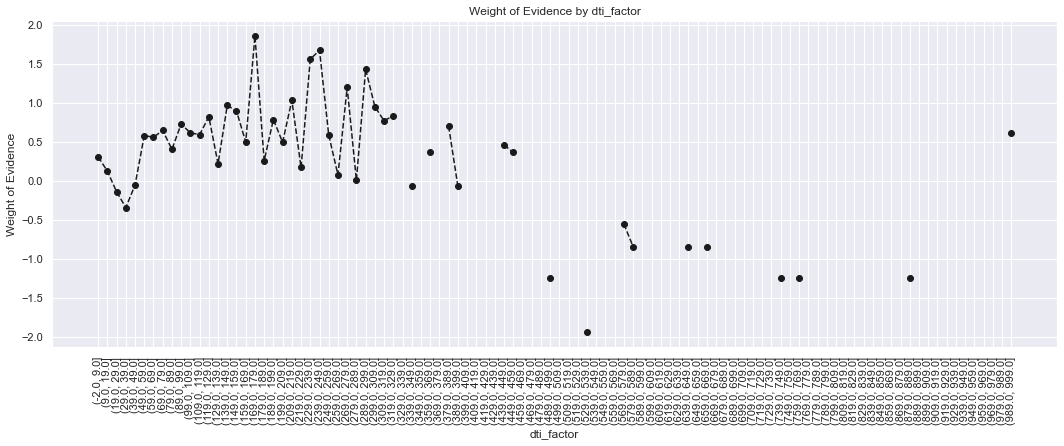

In [108]:
plot_by_woe(df_temp, 90)

In [109]:
df_temp = df.loc[df['dti'] <= 35, : ]

In [110]:
df_temp['dti_factor'] = pd.cut(df_temp['dti'], 50)
df_temp = woe(df_temp, 'dti_factor').sort_values('dti_factor')
df_temp

C:\Users\tejas\AppData\Local\Temp\ipykernel_2452\1319769095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['dti_factor'] = pd.cut(df_temp['dti'], 50)


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
49,"(-1.036, -0.28]",2,1.00000,0.00000,2.00000,0.00000,0.00000,0.00000,inf,0.09090,inf,inf
30,"(-0.28, 0.44]",4314,0.89036,0.00198,3841.00000,473.00000,0.00202,0.00173,0.15106,0.00144,0.01469,inf
41,"(0.44, 1.16]",9399,0.90276,0.00432,8485.00000,914.00000,0.00446,0.00335,0.28489,0.00011,0.00124,inf
36,"(1.16, 1.88]",11889,0.89923,0.00546,10691.00000,1198.00000,0.00562,0.00439,0.24541,0.00073,0.00803,inf
42,"(1.88, 2.6]",14561,0.90358,0.00669,13157.00000,1404.00000,0.00691,0.00515,0.29429,0.00082,0.00940,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
5,"(31.4, 32.12]",25166,0.83176,0.01156,20932.00000,4234.00000,0.01100,0.01553,-0.34520,0.00219,0.01555,inf
2,"(32.12, 32.84]",22956,0.82693,0.01055,18983.00000,3973.00000,0.00997,0.01457,-0.37931,0.00162,0.01130,inf
1,"(32.84, 33.56]",21947,0.82531,0.01009,18113.00000,3834.00000,0.00952,0.01406,-0.39061,0.00980,0.06652,inf
3,"(33.56, 34.28]",20624,0.82836,0.00948,17084.00000,3540.00000,0.00897,0.01298,-0.36932,0.00143,0.00999,inf


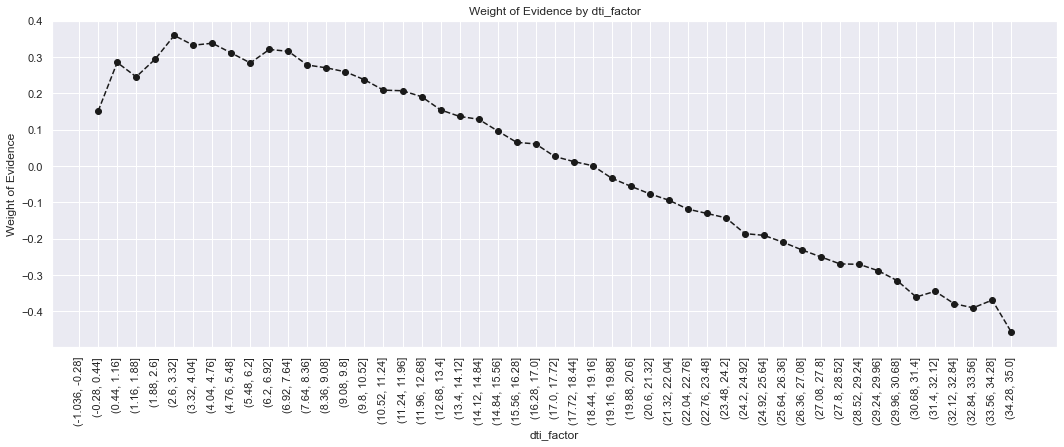

In [111]:
plot_by_woe(df_temp, 90)

In [112]:
df['dti:<=1.4'] = np.where((df['dti'] <= 1.4), 1, 0)
df['dti:1.4-3.5'] = np.where((df['dti'] > 1.4) & (df['dti'] <= 3.5), 1, 0)
df['dti:3.5-7.7'] = np.where((df['dti'] > 3.5) & (df['dti'] <= 7.7), 1, 0)
df['dti:7.7-10.5'] = np.where((df['dti'] > 7.7) & (df['dti'] <= 10.5), 1, 0)
df['dti:10.5-16.1'] = np.where((df['dti'] > 10.5) & (df['dti'] <= 16.1), 1, 0)
df['dti:16.1-20.3'] = np.where((df['dti'] > 16.1) & (df['dti'] <= 20.3), 1, 0)
df['dti:20.3-21.7'] = np.where((df['dti'] > 20.3) & (df['dti'] <= 21.7), 1, 0)
df['dti:21.7-22.4'] = np.where((df['dti'] > 21.7) & (df['dti'] <= 22.4), 1, 0)
df['dti:22.4-35'] = np.where((df['dti'] > 22.4) & (df['dti'] <= 35), 1, 0)
df['dti:>35'] = np.where((df['dti'] > 35), 1, 0)

#### Months since Last Record

In [113]:
df_temp = df[pd.notnull(df['mths_since_last_record'])]
df_temp['mths_since_last_record_factor'] = pd.cut(df_temp['mths_since_last_record'], 50)
df_temp = woe(df_temp, 'mths_since_last_record_factor').\
sort_values('mths_since_last_record_factor')
df_temp

C:\Users\tejas\AppData\Local\Temp\ipykernel_2452\2130666953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['mths_since_last_record_factor'] = pd.cut(df_temp['mths_since_last_record'], 50)


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
1,"(-0.129, 2.58]",1638,0.76740,0.00456,1257.00000,381.00000,0.00413,0.00693,-0.51652,0.26740,1.19368,0.00789
4,"(2.58, 5.16]",1131,0.82317,0.00315,931.00000,200.00000,0.00306,0.00364,-0.17227,0.00058,0.00401,0.00789
8,"(5.16, 7.74]",1059,0.83286,0.00295,882.00000,177.00000,0.00290,0.00322,-0.10417,0.00012,0.00087,0.00789
5,"(7.74, 10.32]",1961,0.82815,0.00546,1624.00000,337.00000,0.00534,0.00613,-0.13764,0.00498,0.03462,0.00789
2,"(10.32, 12.9]",1481,0.81431,0.00412,1206.00000,275.00000,0.00397,0.00500,-0.23191,0.04692,0.28461,0.00789
...,...,...,...,...,...,...,...,...,...,...,...,...
37,"(116.1, 118.68]",5346,0.85260,0.01488,4558.00000,788.00000,0.01499,0.01433,0.04493,0.00238,0.01884,0.00789
3,"(118.68, 121.26]",1240,0.82258,0.00345,1020.00000,220.00000,0.00335,0.00400,-0.17628,0.00827,0.05564,0.00789
49,"(121.26, 123.84]",22,0.95455,0.00006,21.00000,1.00000,0.00007,0.00002,1.33431,0.00455,0.10008,0.00789
48,"(123.84, 126.42]",20,0.95000,0.00006,19.00000,1.00000,0.00006,0.00002,1.23423,0.07623,1.00972,0.00789


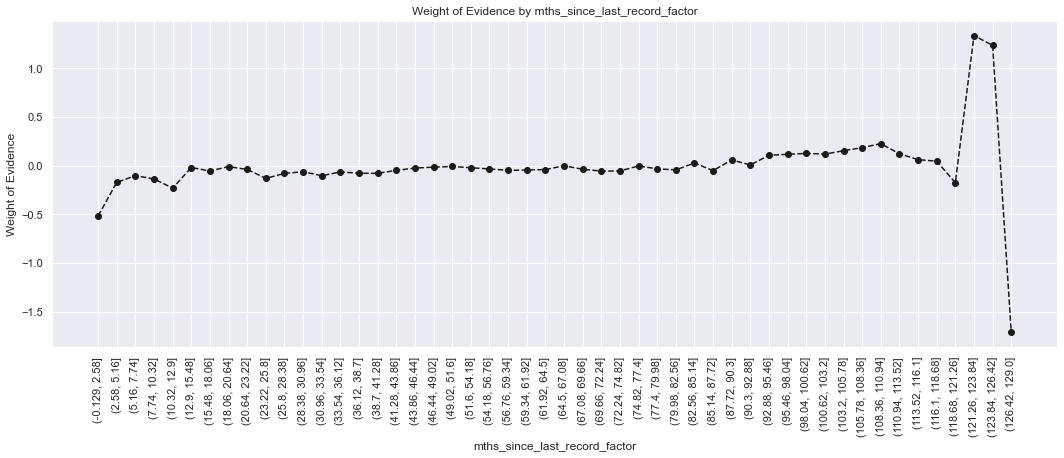

In [114]:
plot_by_woe(df_temp, 90)

In [115]:
df['mths_since_last_record:Missing'] = np.where((df['mths_since_last_record'].isnull()), 1, 0)
df['mths_since_last_record:0-2'] = np.where((df['mths_since_last_record'] >= 0) & (df['mths_since_last_record'] <= 2), 1, 0)
df['mths_since_last_record:3-20'] = np.where((df['mths_since_last_record'] >= 3) & (df['mths_since_last_record'] <= 20), 1, 0)
df['mths_since_last_record:21-31'] = np.where((df['mths_since_last_record'] >= 21) & (df['mths_since_last_record'] <= 31), 1, 0)
df['mths_since_last_record:32-80'] = np.where((df['mths_since_last_record'] >= 32) & (df['mths_since_last_record'] <= 80), 1, 0)
df['mths_since_last_record:81-86'] = np.where((df['mths_since_last_record'] >= 81) & (df['mths_since_last_record'] <= 86), 1, 0)
df['mths_since_last_record:>86'] = np.where((df['mths_since_last_record'] > 86), 1, 0)

In [116]:
df.to_pickle('df_processed.pkl')

## Selecting Features

A limited set of features are selected in a new dataframe

In [117]:
df = pd.read_pickle('df_processed.pkl')

In [118]:
df = df.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
'target'
]]

One of the categories of all the variables is selected as the reference category.

In [119]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [120]:
df = df.drop(ref_categories, axis = 1)
df.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,...,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,target
0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,1
3,0,0,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,1
4,0,0,1,0,0,0,0,1,0,0,1,0,...,1,1,0,0,0,1,0,0,0,0,0,1


## Model Estimation

### Splitting Data

In [121]:
X_train, X_test, y_train, y_test = train_test_split(\
    df.drop('target', axis=1), df['target'], test_size=0.2, \
    random_state=42)

In [122]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1808534, 84) (452134, 84) (1808534,) (452134,)


### Logistic Regression

Logistic Regression can be used as a simple model for PD Modeling.

In [123]:
reg_pd = LogisticRegression(max_iter=1000, solver='saga')
reg_pd.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [124]:
reg_pd.intercept_

array([-0.71021412])

In [125]:
reg_pd.coef_

array([[ 2.82390349e+00,  2.08072747e+00,  1.46797745e+00,
         1.03578683e+00,  5.66361589e-01,  1.68691796e-01,
         1.22578490e-01,  2.54148627e-01,  5.35866204e-02,
        -4.72937749e-04,  4.73460952e-03,  5.69354551e-02,
         6.41266225e-02,  8.61511113e-02,  8.89566168e-02,
         3.08653592e-01,  2.14711604e-01,  5.59116081e-02,
         2.60010968e-01,  2.83817398e-01,  4.43488576e-01,
         3.23764816e-01,  8.06596283e-02,  1.13837908e-01,
         5.80751079e-02,  1.53616509e-01,  6.99362713e-02,
         8.49799113e-02,  1.23680670e-01,  6.01751409e-02,
         1.00019108e-01,  1.00508006e-01,  6.42497366e-02,
         1.51198210e-01,  2.60539190e-01, -2.46309393e-01,
        -2.67703720e-01, -2.60064112e-01, -2.12959478e-01,
        -1.04975145e-01, -1.57318326e-01, -4.11067316e-01,
        -4.71715966e-01, -3.26400423e-01, -2.22177214e-01,
        -1.29893088e-01, -1.99760041e-01, -1.88742310e-01,
        -1.47820868e-01, -1.61841585e-01,  5.51898605e-0

In [126]:
feature_name = X_train.columns.values

In [127]:
summary_table = pd.DataFrame(columns = ['Feature name'], \
                             data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_pd.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_pd.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.71021
1,grade:A,2.82390
2,grade:B,2.08073
3,grade:C,1.46798
4,grade:D,1.03579
...,...,...
80,mths_since_last_record:3-20,0.10986
81,mths_since_last_record:21-31,0.18064
82,mths_since_last_record:32-80,0.20483
83,mths_since_last_record:81-86,0.12037


## Model Validation

### Out of Sample Validation

In [128]:
y_pred = reg_pd.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [129]:
y_pred_proba = reg_pd.predict_proba(X_test)

In [130]:
y_pred_proba

array([[0.10708458, 0.89291542],
       [0.10685728, 0.89314272],
       [0.02864509, 0.97135491],
       ...,
       [0.05070451, 0.94929549],
       [0.09831547, 0.90168453],
       [0.20078721, 0.79921279]])

The first value is the predicted probability for class 0, that is default. The second value is that for class 1, that is non-default. Only the second values are selected.

In [131]:
y_pred_proba = y_pred_proba[:][:,1]

A new dataframe can be created combining target values in test dataset and predicted probabilities.

In [132]:
y_test_temp = y_test
y_test_temp.reset_index(drop=True, inplace=True)
df_pred = pd.concat([y_test_temp, pd.DataFrame(y_pred_proba)], axis = 1)
df_pred.shape

(452134, 2)

In [133]:
df_pred.columns = ['y_test', 'y_pred_proba']
df_pred.index = X_test.index
df_pred.head()

,y_test,y_pred_proba
1758049,1,0.89292
686533,1,0.89314
900721,1,0.97135
1727912,1,0.68033
539691,1,0.97584


### Accuracy and Area under the Curve

In [134]:
tr = 0.9
df_pred['y_pred'] = np.where(df_pred['y_pred_proba'] > tr, 1, 0)
df_pred.head()

,y_test,y_pred_proba,y_pred
1758049,1,0.89292,0
686533,1,0.89314,0
900721,1,0.97135,1
1727912,1,0.68033,0
539691,1,0.97584,1


In [135]:
accuracy_score(df_pred['y_test'], df_pred['y_pred'])

0.5460173311451915

In [136]:
cm = confusion_matrix(df_pred['y_test'], df_pred['y_pred'],\
                      labels=reg_pd.classes_)
cm

array([[ 44825,  12240],
       [193021, 202048]], dtype=int64)

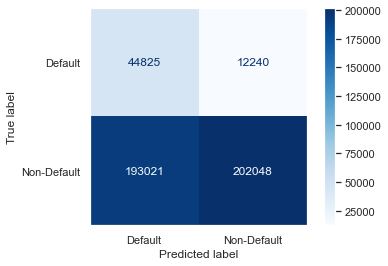

In [137]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,\
       display_labels=['Default', 'Non-Default'])
disp.plot(cmap="Blues", values_format='')
plt.grid(False);

It can be seen that there are a lot of false positives and lot of false negatives for the given threshold. Thus, accuracy is not the best estimate of model performance. It's better to look at ROC curve.

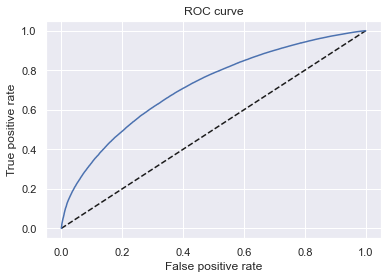

In [140]:
fpr, tpr, thresholds = roc_curve(df_pred['y_test'], df_pred['y_pred_proba'])
disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [141]:
roc_auc_score(df_pred['y_test'], df_pred['y_pred_proba'])

0.7157460872408515

## Applying the PD Model

The probability of default for a single consumer can simply be calculated by summing the regression coefficients of the variables that have a value of 1 for that consumer. As an example calculation, if the summation of coefficients for the first consumer is 2.5. Then,
$$
\ln\left(\frac{1-PD}{PD}\right) = 2.5 \\
\left(\frac{1-PD}{PD}\right) = e^{2.5} = 12.2\\
1-PD = \frac{12.2}{12.2+1} = 0.92
$$

This is the probability of Non-Default, and would be the value in predicted probabilities column.

### Creating a Scorecard

It's useful to create a scorecard for simple interpretation of regression predictions. In order to create such a scorecard, it is necessary to include all the features, including the ones used as reference categories. These are added, each having a coefficient of 0.

In [142]:
df_ref = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref['Coefficients'] = 0
df_ref.head()

,Feature name,Coefficients
0,grade:G,0
1,home_ownership:RENT_OTHER_NONE_ANY,0
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0
3,verification_status:Verified,0
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0


In [143]:
df_scorecard = pd.concat([summary_table, df_ref])
df_scorecard.reset_index(drop=True,inplace=True)
df_scorecard.head()

,Feature name,Coefficients
0,Intercept,-0.71021
1,grade:A,2.82390
2,grade:B,2.08073
3,grade:C,1.46798
4,grade:D,1.03579


In [144]:
df_scorecard['Original feature name'] = df_scorecard['Feature name']\
.str.split(':').str[0]
df_scorecard.head()

,Feature name,Coefficients,Original feature name
0,Intercept,-0.71021,Intercept
1,grade:A,2.82390,grade
2,grade:B,2.08073,grade
3,grade:C,1.46798,grade
4,grade:D,1.03579,grade


In [145]:
# Credit Score Limits
min_score = 300
max_score = 850

The lowest PD score would correspond to the lowest coefficient for each feature, while the highest one would correspond to the highest coefficient for each feature. This can be used to create a scorecard.

In [146]:
min_sum_coef = df_scorecard.groupby('Original feature name')\
['Coefficients'].min().sum()
min_sum_coef

-2.052575746967293

In [147]:
max_sum_coef = df_scorecard.groupby('Original feature name')\
['Coefficients'].max().sum()
max_sum_coef

5.261077582397079

In [148]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard.head()

,Feature name,Coefficients,Original feature name,Score - Calculation
0,Intercept,-0.71021,Intercept,-53.40939
1,grade:A,2.82390,grade,212.36267
2,grade:B,2.08073,grade,156.47448
3,grade:C,1.46798,grade,110.39457
4,grade:D,1.03579,grade,77.89305


A different formula is used for calculation of Intercept score, since it is not a dummy variable. The score corresponding to the intercept is very close to the minimum score in the worst case scenario. Thus, we can set it as 300.

In [149]:
df_scorecard.loc[0,'Score - Calculation'] = \
((df_scorecard['Coefficients'][0] - min_sum_coef) \
 / (max_sum_coef - min_sum_coef)) * (max_score - min_score) \
+ min_score
df_scorecard.head()

,Feature name,Coefficients,Original feature name,Score - Calculation
0,Intercept,-0.71021,Intercept,400.94803
1,grade:A,2.82390,grade,212.36267
2,grade:B,2.08073,grade,156.47448
3,grade:C,1.46798,grade,110.39457
4,grade:D,1.03579,grade,77.89305


In [150]:
df_scorecard['Score - Preliminary'] = np.round(df_scorecard['Score - Calculation'])
df_scorecard.head()

,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary
0,Intercept,-0.71021,Intercept,400.94803,401.00000
1,grade:A,2.82390,grade,212.36267,212.00000
2,grade:B,2.08073,grade,156.47448,156.00000
3,grade:C,1.46798,grade,110.39457,110.00000
4,grade:D,1.03579,grade,77.89305,78.00000


In [151]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')\
['Score - Preliminary'].min().sum()
min_sum_score_prel

301.0

In [152]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')\
['Score - Preliminary'].max().sum()
max_sum_score_prel

849.0

The difference is due to rounding. The maximum and minimum rounding difference can be checked and some specific values can be altered to get the exact range of 300-850.

In [153]:
df_scorecard.groupby('Original feature name', as_index=False)\
[['Score - Calculation', 'Score - Preliminary']].min()

,Original feature name,Score - Calculation,Score - Preliminary
0,Intercept,400.94803,401.00000
1,acc_now_delinq,-2.38109,-2.00000
2,addr_state,-0.03557,-0.00000
3,annual_inc,-10.12034,-10.00000
4,dti,-17.78301,-18.00000
5,emp_length,0.00000,0.00000
6,grade,0.00000,0.00000
7,home_ownership,0.00000,0.00000
8,initial_list_status,0.00000,0.00000
9,inq_last_6mths,0.00000,0.00000


The int_rate value can be set to -36, since it has the most rounding error.

In [154]:
df_scorecard.groupby('Original feature name', as_index=False)\
[['Score - Calculation', 'Score - Preliminary']].max()

,Original feature name,Score - Calculation,Score - Preliminary
0,Intercept,400.94803,401.00000
1,acc_now_delinq,0.00000,0.00000
2,addr_state,33.35115,33.00000
3,annual_inc,15.65102,16.00000
4,dti,6.25366,6.00000
5,emp_length,11.37038,11.00000
6,grade,212.36267,212.00000
7,home_ownership,19.11244,19.00000
8,initial_list_status,6.39064,6.00000
9,inq_last_6mths,41.50378,42.00000


The inq_last_6mths and initial_list_status can be increases by 1 since they have the highest rounding errors.

In [155]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard.loc[43,'Score - Final'] = -36
df_scorecard.loc[28,'Score - Final'] = 7
df_scorecard.loc[51,'Score - Final'] = 42
df_scorecard.head()

,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary,Score - Final
0,Intercept,-0.71021,Intercept,400.94803,401.00000,401.00000
1,grade:A,2.82390,grade,212.36267,212.00000,212.00000
2,grade:B,2.08073,grade,156.47448,156.00000,156.00000
3,grade:C,1.46798,grade,110.39457,110.00000,110.00000
4,grade:D,1.03579,grade,77.89305,78.00000,78.00000


In [156]:
print('Min. Score:', df_scorecard.groupby('Original feature name')\
      ['Score - Final'].min().sum())
print('Max. Score:', df_scorecard.groupby('Original feature name')\
      ['Score - Final'].max().sum())

Min. Score: 300.0
Max. Score: 850.0


# LGD and EAD Models

## Data Preparation

In [157]:
df_full = pd.read_pickle('df_processed.pkl')
df_full.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
0,2500,2500,2500.00000,36 months,13.56000,84.92000,C,C1,Chef,10+ years,RENT,55000.00000,...,1,0,0,0,0,0,0,0,0,1,0,0
1,30000,30000,30000.00000,60 months,18.94000,777.23000,D,D2,Postmaster,10+ years,MORTGAGE,90000.00000,...,0,0,0,1,0,0,0,0,0,1,0,0
2,5000,5000,5000.00000,36 months,17.97000,180.69000,D,D1,Administrative,6 years,MORTGAGE,59280.00000,...,0,0,0,0,0,1,0,0,0,0,0,0
3,4000,4000,4000.00000,36 months,18.94000,146.51000,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.00000,...,1,0,0,0,0,1,0,0,0,0,0,0
4,30000,30000,30000.00000,60 months,16.14000,731.78000,C,C4,Mechanic,10+ years,MORTGAGE,57250.00000,...,0,0,0,1,0,1,0,0,0,0,0,0


Only the accounts that were charged-off are required to be considered.

In [158]:
df_defaults = df_full[df_full['loan_status'].isin\
  (['Charged Off','Does not meet the credit policy. Status:Charged Off'])]
df_defaults.reset_index(drop=True, inplace=True)
df_defaults.head()
df_defaults = df_defaults.copy()

Some missing values need to be filled.

In [159]:
df_defaults.loc[:,'mths_since_last_delinq'].fillna(0, inplace=True)
df_defaults.loc[:,'mths_since_last_record'].fillna(0, inplace=True)
df_defaults.loc[:,'dti'].fillna(0, inplace=True)

For LGD model, the dependent variable is the recovery rate, which is the ratio of recoveries to funded amount.

In [160]:
df_defaults['recovery_rate'] = df_defaults['recoveries'] / \
    df_defaults['funded_amnt']
df_defaults['recovery_rate'].describe()

count   262416.00000
mean         0.07327
std          0.09435
min          0.00000
25%          0.00000
50%          0.05842
75%          0.11031
max          2.17030
Name: recovery_rate, dtype: float64

Some of the recovery rates are greater than 1. This is likely due to error in data. They can be set to 1 manually.

In [161]:
df_defaults['recovery_rate'] = np.where(df_defaults['recovery_rate'] > 1,\
                                        1, df_defaults['recovery_rate'])
df_defaults['recovery_rate'] = np.where(df_defaults['recovery_rate'] < 0, \
                                        0, df_defaults['recovery_rate'])

In [162]:
df_defaults['recovery_rate'].describe()

count   262416.00000
mean         0.07324
std          0.09401
min          0.00000
25%          0.00000
50%          0.05842
75%          0.11031
max          1.00000
Name: recovery_rate, dtype: float64

For the EAD model, a Credit Conversion Factor is required as the dependent variable. This is the ratio of the total defaulted amount to the total funded amount.

In [163]:
df_defaults['CCF'] = (df_defaults['funded_amnt'] - df_defaults['total_rec_prncp']) / df_defaults['funded_amnt']
df_defaults['CCF'].describe()

count   262416.00000
mean         0.69828
std          0.21808
min          0.00000
25%          0.56844
50%          0.74834
75%          0.87243
max          1.00000
Name: CCF, dtype: float64

## Variable Exploration

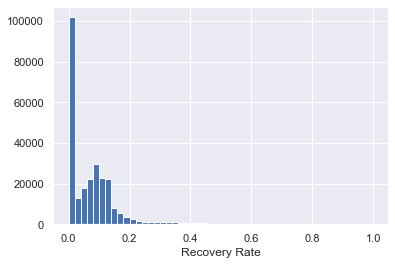

In [164]:
plt.hist(df_defaults['recovery_rate'], bins = 50)
plt.xlabel('Recovery Rate');

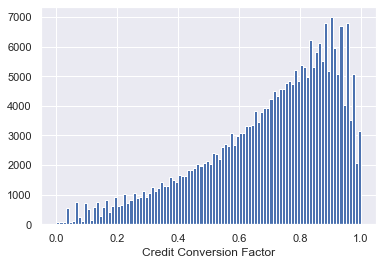

In [165]:
plt.hist(df_defaults['CCF'], bins = 100)
plt.xlabel('Credit Conversion Factor');

A majority of the consumers have 0 recovery rate. Thus, it makes sense to split the problem of LGD model into two parts: Classify whether a consumer has 0 recovery rate or not, and then predict the recovery rate if it is freater than 0.

On the other hand, the Credit Conversion Factor is distributed well enough to solve it as a Linear Regression model.

In [166]:
df_defaults['recovery_rate_0_1'] = np.where(df_defaults['recovery_rate'] == 0, 0, 1)

## LGD Model

### Stage 1 - Logistic Regression

### Splitting the Data

In [167]:
X1_train, X1_test, y1_train, y1_test = train_test_split(\
df_defaults.drop(['target', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1),\
df_defaults['recovery_rate_0_1'], test_size = 0.2, random_state = 42)

In [168]:
# List of independent variables for the LGD model.
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_len_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']

In [169]:
features_reference = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']

In [170]:
X1_train = X1_train[features_all]
X1_train.drop(columns=features_reference, axis=1, inplace=True)
X1_train.isnull().sum()

grade:A             0
grade:B             0
grade:C             0
grade:D             0
grade:E             0
                   ..
open_acc            0
pub_rec             0
total_acc           0
acc_now_delinq      0
total_rev_hi_lim    0
Length: 44, dtype: int64

In [171]:
X1_test = X1_test[features_all]
X1_test.drop(columns=features_reference, axis=1, inplace=True)

### Model Estimation

In [172]:
reg1 = LogisticRegression(max_iter=1000)
reg1.fit(X1_train, y1_train)

LogisticRegression(max_iter=1000)

In [173]:
feature_name = X1_train.columns.values

In [175]:
summary_table = pd.DataFrame(columns = ['Feature name'], \
                             data = feature_name)
summary_table['Coefficients'] = np.transpose(reg1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg1.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.00040
1,grade:A,-0.00029
2,grade:B,-0.00028
3,grade:C,-0.00000
4,grade:D,-0.00003
...,...,...
40,open_acc,-0.00247
41,pub_rec,0.00016
42,total_acc,-0.00009
43,acc_now_delinq,0.00002


### Model Validation

In [176]:
y1_pred = reg1.predict(X1_test)
y1_pred

array([0, 0, 1, ..., 1, 1, 1])

In [177]:
y1_pred_proba = reg1.predict_proba(X1_test)
y1_pred_proba = y1_pred_proba[: ][: , 1]
y1_pred_proba

array([0.48119682, 0.44417578, 0.70598449, ..., 0.7106299 , 0.76415331,
       0.73150306])

In [178]:
y1_test_temp = y1_test
y1_test_temp.reset_index(drop=True, inplace=True)
df_pred = pd.concat([y1_test_temp, pd.DataFrame(y1_pred_proba)], axis = 1)
df_pred.shape

(52484, 2)

In [179]:
df_pred.columns = ['y1_test', 'y1_pred_proba']
df_pred.index = X1_test.index
df_pred.head()

,y1_test,y1_pred_proba
72823,1,0.48120
4295,0,0.44418
58845,1,0.70598
241536,0,0.77243
3312,0,0.53788


### Model Validation

In [180]:
y1_pred = reg1.predict(X1_test)
y1_pred

array([0, 0, 1, ..., 1, 1, 1])

In [181]:
y1_pred_proba = reg1.predict_proba(X1_test)
y1_pred_proba = y1_pred_proba[: ][: , 1]
y1_pred_proba

array([0.48119682, 0.44417578, 0.70598449, ..., 0.7106299 , 0.76415331,
       0.73150306])

In [182]:
y1_test_temp = y1_test
y1_test_temp.reset_index(drop=True, inplace=True)
df_pred = pd.concat([y1_test_temp, pd.DataFrame(y1_pred_proba)], axis = 1)
df_pred.shape

(52484, 2)

In [183]:
df_pred.columns = ['y1_test', 'y1_pred_proba']
df_pred.index = X1_test.index
df_pred.head()

,y1_test,y1_pred_proba
72823,1,0.48120
4295,0,0.44418
58845,1,0.70598
241536,0,0.77243
3312,0,0.53788


### Accuracy and Area under the Curve

In [184]:
tr = 0.5
df_pred['y1_pred'] = np.where(df_pred['y1_pred_proba'] > tr, 1, 0)
df_pred.head()

,y1_test,y1_pred_proba,y1_pred
72823,1,0.48120,0
4295,0,0.44418,0
58845,1,0.70598,1
241536,0,0.77243,1
3312,0,0.53788,1


In [185]:
accuracy_score(df_pred['y1_test'], df_pred['y1_pred'])

0.6966123008917003

In [186]:
cm = confusion_matrix(df_pred['y1_test'], df_pred['y1_pred'],\
                      labels=reg1.classes_)
cm

array([[ 3436, 13530],
       [ 2393, 33125]], dtype=int64)

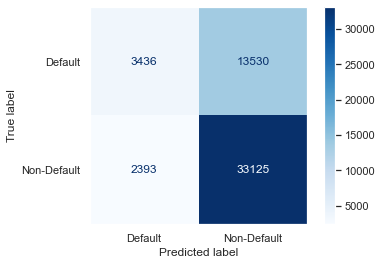

In [187]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,\
       display_labels=['Default', 'Non-Default'])
disp.plot(cmap="Blues", values_format='')
plt.grid(False);

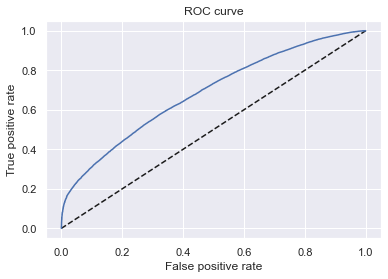

In [188]:
fpr, tpr, thresholds = roc_curve(df_pred['y1_test'], df_pred['y1_pred_proba'])
disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [189]:
roc_auc_score(df_pred['y1_test'], df_pred['y1_pred_proba'])

0.68550677735965

### Stage 2 - Linear Regression

### Model Estimation

In [190]:
df = df_defaults[df_defaults['recovery_rate_0_1'] == 1]

In [191]:
X2_train, X2_test, y2_train, y2_test = train_test_split(\
    df.drop(['target', 'recovery_rate','recovery_rate_0_1', 'CCF'],\
    axis = 1), df['recovery_rate'], test_size = 0.2, random_state = 42)

In [192]:
X2_train = X2_train[features_all]
X2_train.drop(columns=features_reference, axis=1, inplace=True)
X2_test = X2_test[features_all]
X2_test.drop(columns=features_reference, axis=1, inplace=True)

In [193]:
reg2 = LinearRegression()
reg2.fit(X2_train, y2_train)

LinearRegression()

In [194]:
feature_name = X2_train.columns.values

In [195]:
summary_table = pd.DataFrame(columns = ['Feature name'], \
                             data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,0.14800
1,grade:A,-0.03200
2,grade:B,-0.03372
3,grade:C,-0.02826
4,grade:D,-0.01933
...,...,...
40,open_acc,-0.00080
41,pub_rec,-0.00191
42,total_acc,0.00047
43,acc_now_delinq,-0.00022


### Model Validation

In [196]:
y2_pred = reg2.predict(X2_test)
y2_pred

array([0.06902075, 0.12749619, 0.10390184, ..., 0.12352321, 0.09931829,
       0.0761741 ])

In [197]:
y2_test_temp = y2_test
y2_test_temp.reset_index(drop=True, inplace=True)
df_pred = pd.concat([y2_test_temp, pd.DataFrame(y2_pred)], axis = 1)
df_pred.shape

(35501, 2)

In [198]:
df_pred.columns = ['y2_test', 'y2_pred']
df_pred.index = X2_test.index
df_pred.head()

,y2_test,y2_pred
195901,0.09421,0.06902
63965,0.11547,0.12750
147167,0.17278,0.10390
139454,0.07184,0.11784
83384,0.20074,0.10947


C:\Users\tejas\anaconda3\envs\coursera\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


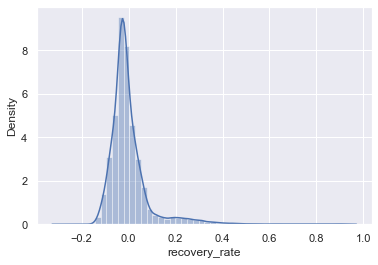

In [199]:
sns.distplot(y2_test - y2_pred);

### Combining Stage 1 and Stage 2

The combination can be done by using Linear Regression on Stage 1 data, and then keeping the predicted recovery rates only for those that are greater than 0.

In [200]:
y_pred_all = reg2.predict(X1_test)
y_pred_all

array([0.1278392 , 0.12520775, 0.10347342, ..., 0.09762653, 0.11302011,
       0.09060555])

In [201]:
y_pred = y1_pred * y_pred_all
pd.DataFrame(y_pred).describe()

,0
count,52484.00000
mean,0.09622
std,0.03829
min,0.00000
25%,0.09089
50%,0.10726
75%,0.11932
max,0.27208


In [202]:
y_pred = np.where(y_pred < 0, 0, y_pred)
y_pred = np.where(y_pred > 1, 1, y_pred)

In [203]:
y_pred

array([0.        , 0.        , 0.10347342, ..., 0.09762653, 0.11302011,
       0.09060555])

These are the LGD model predictions.

## EAD Model

### Model Estimation

In [204]:
X_train, X_test, y_train, y_test = train_test_split(df_defaults.drop\
(['target', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), \
df_defaults['CCF'], test_size = 0.2, random_state = 42)

In [205]:
X_train = X_train[features_all]
X_train.drop(columns=features_reference, axis=1, inplace=True)
X_test = X_test[features_all]
X_test.drop(columns=features_reference, axis=1, inplace=True)

In [206]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [207]:
feature_name = X_train.columns.values

In [208]:
summary_table = pd.DataFrame(columns = ['Feature name'], \
                             data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,0.44814
1,grade:A,0.03517
2,grade:B,0.03104
3,grade:C,0.03044
4,grade:D,0.02682
...,...,...
40,open_acc,-0.00221
41,pub_rec,-0.00774
42,total_acc,0.00063
43,acc_now_delinq,0.00651


### Model Validation

In [209]:
y_pred = reg.predict(X_test)
y_pred

array([0.81167619, 0.70005776, 0.64399217, ..., 0.5826794 , 0.72239702,
       0.58506923])

In [210]:
y_test_temp = y_test
y_test_temp.reset_index(drop=True, inplace=True)
df_pred = pd.concat([y_test_temp, pd.DataFrame(y_pred)], axis = 1)
df_pred.shape

(52484, 2)

In [211]:
df_pred.columns = ['y_test', 'y_pred']
df_pred.index = X_test.index
df_pred.head()

,y_test,y_pred
72823,0.84377,0.81168
4295,0.87743,0.70006
58845,0.68846,0.64399
241536,0.84723,0.73693
3312,0.87493,0.72106


C:\Users\tejas\anaconda3\envs\coursera\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


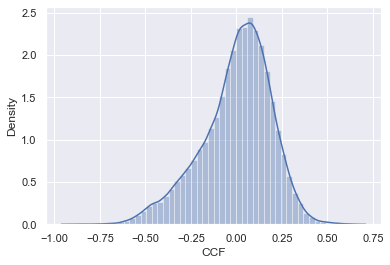

In [212]:
sns.distplot(y_test - y_pred);

In [213]:
pd.DataFrame(y_pred).describe()

,0
count,52484.00000
mean,0.69844
std,0.10525
min,0.27482
25%,0.62409
50%,0.69557
75%,0.76941
max,1.05890


In [214]:
y_pred = np.where(y_pred < 0, 0, y_pred)
y_pred = np.where(y_pred > 1, 1, y_pred)

In [215]:
y_pred

array([0.81167619, 0.70005776, 0.64399217, ..., 0.5826794 , 0.72239702,
       0.58506923])

# Expected Loss

In [216]:
df_full.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
0,2500,2500,2500.00000,36 months,13.56000,84.92000,C,C1,Chef,10+ years,RENT,55000.00000,...,1,0,0,0,0,0,0,0,0,1,0,0
1,30000,30000,30000.00000,60 months,18.94000,777.23000,D,D2,Postmaster,10+ years,MORTGAGE,90000.00000,...,0,0,0,1,0,0,0,0,0,1,0,0
2,5000,5000,5000.00000,36 months,17.97000,180.69000,D,D1,Administrative,6 years,MORTGAGE,59280.00000,...,0,0,0,0,0,1,0,0,0,0,0,0
3,4000,4000,4000.00000,36 months,18.94000,146.51000,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.00000,...,1,0,0,0,0,1,0,0,0,0,0,0
4,30000,30000,30000.00000,60 months,16.14000,731.78000,C,C4,Mechanic,10+ years,MORTGAGE,57250.00000,...,0,0,0,1,0,1,0,0,0,0,0,0


In [217]:
df_full['mths_since_last_delinq'].fillna(0, inplace = True)
df_full['mths_since_last_record'].fillna(0, inplace = True)
df_full['dti'].fillna(0, inplace = True)

In [218]:
df = df_full[features_all]
df = df.copy()
df.drop(features_reference, axis=1, inplace=True)

In [219]:
df.shape

(2260668, 44)

In [220]:
df_full['recovery_rate_st_1'] = reg1.predict(df)

In [221]:
df_full['recovery_rate_st_2'] = reg2.predict(df)

In [222]:
df_full['recovery_rate'] = df_full['recovery_rate_st_1'] * \
        df_full['recovery_rate_st_2']

In [223]:
df_full['recovery_rate'] = np.where(df_full['recovery_rate'] < 0, 0, df_full['recovery_rate'])
df_full['recovery_rate'] = np.where(df_full['recovery_rate'] > 1, 1, df_full['recovery_rate'])

In [224]:
df_full['LGD'] = 1 - df_full['recovery_rate']

In [225]:
df_full['LGD'].describe()

count   2260668.00000
mean          0.92917
std           0.05258
min           0.00000
25%           0.88616
50%           0.90369
75%           1.00000
max           1.00000
Name: LGD, dtype: float64

In [226]:
df_full['CCF'] = reg.predict(df)

In [227]:
df_full['CCF'] = np.where(df_full['CCF'] < 0, 0, df_full['CCF'])
df_full['CCF'] = np.where(df_full['CCF'] > 1, 1, df_full['CCF'])

In [228]:
df_full['EAD'] = df_full['CCF'] * df['funded_amnt']

In [229]:
df_full['EAD'].describe()

count   2260668.00000
mean      10776.05154
std        7318.07096
min           0.00000
25%        5073.06338
50%        8960.15785
75%       14741.20487
max       40000.00000
Name: EAD, dtype: float64

In [230]:
df_full.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,recovery_rate_st_1,recovery_rate_st_2,recovery_rate,LGD,CCF,EAD
0,2500,2500,2500.00000,36 months,13.56000,84.92000,C,C1,Chef,10+ years,RENT,55000.00000,...,0,0,0,1,0,0,0,0.14909,0.00000,1.00000,0.78754,1968.85858
1,30000,30000,30000.00000,60 months,18.94000,777.23000,D,D2,Postmaster,10+ years,MORTGAGE,90000.00000,...,0,0,0,1,0,0,0,0.16412,0.00000,1.00000,0.90983,27294.79163
2,5000,5000,5000.00000,36 months,17.97000,180.69000,D,D1,Administrative,6 years,MORTGAGE,59280.00000,...,0,0,0,0,0,0,0,0.14607,0.00000,1.00000,0.80874,4043.70813
3,4000,4000,4000.00000,36 months,18.94000,146.51000,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.00000,...,0,0,0,0,0,0,0,0.14527,0.00000,1.00000,0.80208,3208.33385
4,30000,30000,30000.00000,60 months,16.14000,731.78000,C,C4,Mechanic,10+ years,MORTGAGE,57250.00000,...,0,0,0,0,0,0,0,0.15003,0.00000,1.00000,0.92177,27653.07014


In [231]:
# PD model
df = pd.read_pickle('df_processed.pkl')

In [232]:
features_all_pd = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86']

In [233]:
feature_references_pd = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [234]:
df_temp = df[features_all_pd]
df_temp = df_temp.copy()
df_temp.drop(columns=feature_references_pd, axis=1, inplace=True)

In [235]:
df['PD'] = reg_pd.predict_proba(df_temp)[: ][: , 0]

In [244]:
df_new = pd.concat([df_full, df], axis=1)
df_new = df_new.loc[:,~df_new.columns.duplicated()].copy()

In [245]:
df_new.shape

(2260668, 364)

In [247]:
df_new['EL'] = df_new['PD'] * df_new['LGD'] * df_new['EAD']
df_new['EL'].describe()

count   2260668.00000
mean       1303.46671
std        1458.14313
min           0.00000
25%         350.06105
50%         779.44512
75%        1715.57999
max       19269.85679
Name: EL, dtype: float64

In [248]:
df_new[['funded_amnt', 'PD', 'LGD', 'EAD', 'EL']].head()

,funded_amnt,PD,LGD,EAD,EL
0,2500,0.14343,1.00000,1968.85858,282.39721
1,30000,0.17343,1.00000,27294.79163,4733.77083
2,5000,0.10793,1.00000,4043.70813,436.45194
3,4000,0.08987,1.00000,3208.33385,288.31757
4,30000,0.09611,1.00000,27653.07014,2657.79800


In [249]:
# Total Expected Loss for all loans
df_new['EL'].sum()

2946705470.6807604

In [250]:
# Total Funded Amount for all loans
df_new['funded_amnt'].sum()

34004208600

In [251]:
# Total Expected Loss as a proportion of Total Funded Amount for all loans
df_new['EL'].sum() / df_new['funded_amnt'].sum()

0.08665708134377109